<div style="display: flex; justify-content: space-between; align-items: flex-start; margin-bottom: 20px;">
  <img src="Escudo-UNAM-escalable.svg" width="100" height="100" alt="Escudo UNAM" style="margin-right: 15px;">

  <div style="text-align: center; flex-grow: 1;">
    <p>
      <b>UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO</b><br>
      <i>Facultad de Ciencias</i><br>
      <i>Semestre 2026-1</i>
    </p>

  ---

  <p>
      <span style="font-size: 22px; font-weight: bold;">Introdución a Redes Neuronales.</span><br>
      <i>Proyecto Final</i><br>
      <i>Clasificación de galaxias con estructura de marea y sin estructura de marea</i>
    </p>

  ---

  <p>
      <b >Angel Galván Magdiel Joshua&ensp;&ensp;&ensp;Gómez Gómez Patricio Emanuel</b><br>
      <br>319052590&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;319024234</br>
    </p>
  </div>

  <img src="Escudo-facultad-ciencias-unam-escalable.svg" width="100" height="100" alt="Escudo Facultad de Ciencias" style="margin-left: 15px;">
</div>

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>Carga y exploración de datos</b>
</div>

---

Primero importamos todas las librerías básicas para empezar a trabajar en el proyecto.

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os                                           #manipulación de rutas y archivos del sistema
from PIL import Image                               #manejo de imágenes

# PyTorch y componentes para redes neuronales
import torch                                        #framework principal para modelos, ten
import torch.nn as nn                               #módulo para construir redes neuronales
import torch.optim as optim                         #módulo para optimizadores
from torch.utils.data import Dataset, DataLoader    #clases para manejar datasets y cargar datos en lotes
from torchvision import transforms                  #transformaciones para preprocesamiento de imágenes

# Para dividir datos y métricas
from sklearn.model_selection import train_test_split                    #dividir datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import classification_report, confusion_matrix     #métricas para evaluar modelos de clasificación

# Verificar si GPU está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo en uso: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Dispositivo en uso: cuda
GPU: NVIDIA GeForce RTX 5070


Cargamos el archivo con las galaxias y hacemos un muestreo visual preeliminar del contenido.

In [2]:
# Cargar el archivo CSV con información de las galaxias
data = pd.read_csv('galaxias.csv')
print(f"Total de galaxias: {len(data)}")                    #Número total de galaxias en el dataset
print(f"\nColumnas del dataset: {list(data.columns)}")      #Nombres de las columnas en el dataset
print(f"\nPrimeras filas:")                                 #Mostrar las primeras filas del dataset
data.head()


Total de galaxias: 5609

Columnas del dataset: ['name', 'Type', 'Bars', 'Tidal', 'g-i']

Primeras filas:


name  Type  Bars  Tidal     g-i
0  manga-8947-1902  -5.0   0.0    0.0  1.1157
1  manga-8481-1901  -5.0   0.0    0.0 -0.1324
2  manga-9196-6102  -5.0   0.0    0.0  1.1801
3  manga-9512-3703  -5.0   0.0    0.0  1.0456
4  manga-7964-1901  -5.0   0.0    1.0  0.9352

En la tabla podemos ver que tenemos las comlumnas:
- Bars,
- Tidal, y
- g-i

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>Bars:</b><br>
    <i>Estructura lineal brillante de estrellas atravesando el centro de la galaxia.</i>
    </p>
</div>

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#aabcfe;border-spacing:0;}
.tg td{background-color:#e8edff;border-color:#aabcfe;border-style:solid;border-width:1px;color:#669;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#b9c9fe;border-color:#aabcfe;border-style:solid;border-width:1px;color:#039;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-qvrf{border-color:inherit;font-family:Georgia, serif !important;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-49iy{border-color:inherit;font-family:Georgia, serif !important;text-align:center;vertical-align:top}
</style>

<center>
  <table class="tg"><thead>
    <tr>
      <th class="tg-qvrf">Valor típico</th>
      <th class="tg-qvrf">Significado</th>
    </tr></thead>
  <tbody>
    <tr>
      <td class="tg-49iy">0</td>
      <td class="tg-49iy">Sin barra</td>
    </tr>
    <tr>
      <td class="tg-49iy">1</td>
      <td class="tg-49iy">Barra presente en la estructura galáctica</td>
    </tr>
  </tbody>
</table>
</center>

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>Tidal:</b><br>
    <i>Presencia de deformaciones causadas por interacciones gravitacionales con otras galaxias.</i>
    </p>
</div>

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#aabcfe;border-spacing:0;}
.tg td{background-color:#e8edff;border-color:#aabcfe;border-style:solid;border-width:1px;color:#669;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#b9c9fe;border-color:#aabcfe;border-style:solid;border-width:1px;color:#039;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-qvrf{border-color:inherit;font-family:Georgia, serif !important;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-49iy{border-color:inherit;font-family:Georgia, serif !important;text-align:center;vertical-align:top}
</style>

<center>
  <table class="tg"><thead>
    <tr>
      <th class="tg-qvrf">Valor típico</th>
      <th class="tg-qvrf">Significado</th>
    </tr></thead>
  <tbody>
    <tr>
      <td class="tg-49iy">0</td>
      <td class="tg-49iy">Galaxia sin estructuras de marea (forma regular)</td>
    </tr>
    <tr>
      <td class="tg-49iy">1</td>
      <td class="tg-49iy">Galaxia con estructuras de marea visibles</td>
    </tr>
  </tbody>
</table>
</center>

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>g-i:</b><br>
    <i>Diferencia de magnitud entre los filtros g (verde) e i (infrarrojo cercano).</i>
    </p>
</div>

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#aabcfe;border-spacing:0;}
.tg td{background-color:#e8edff;border-color:#aabcfe;border-style:solid;border-width:1px;color:#669;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#b9c9fe;border-color:#aabcfe;border-style:solid;border-width:1px;color:#039;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-qvrf{border-color:inherit;font-family:Georgia, serif !important;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-49iy{border-color:inherit;font-family:Georgia, serif !important;text-align:center;vertical-align:top}
</style>

<center>
  <table class="tg"><thead>
    <tr>
      <th class="tg-qvrf">Valor típico</th>
      <th class="tg-qvrf">Significado</th>
    </tr></thead>
  <tbody>
    <tr>
      <td class="tg-49iy">Bajo -> Azul</td>
      <td class="tg-49iy">Alta formación estelar (jóvenes)</td>
    </tr>
    <tr>
      <td class="tg-49iy">Alto -> Rojo</td>
      <td class="tg-49iy">Poblaciones estelares viejas o polvo</td>
    </tr>
  </tbody>
</table>
</center>

Ahora hacemos un análisis de la estructura del dataset y la distribución de la clase objetivo (Tidal), esto es clave para justificar balance de clases, necesidad de *_data augmentation_* y posibles estrategias para evitar overfitting.

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5609 non-null   object 
 1   Type    5498 non-null   float64
 2   Bars    5498 non-null   float64
 3   Tidal   5498 non-null   float64
 4   g-i     5497 non-null   float64
dtypes: float64(4), object(1)
memory usage: 219.2+ KB

Distribución de la columna Tidal (estructura de marea):
Tidal
0.0    4561
1.0     937
Name: count, dtype: int64


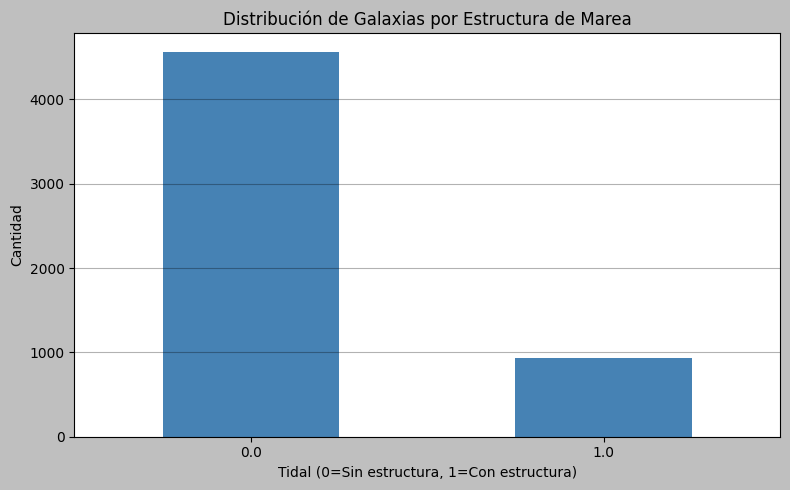

Type         Bars        Tidal          g-i
count  5498.000000  5498.000000  5498.000000  5497.000000
mean      1.088578     0.254820     0.170426     0.979889
std       3.847840     0.391665     0.376040     0.338889
min      -5.000000    -0.500000     0.000000    -9.775000
25%      -2.000000     0.000000     0.000000     0.818800
50%       2.000000     0.000000     0.000000     1.059600
75%       4.000000     0.500000     0.000000     1.169200
max      11.000000     1.000000     1.000000     2.113900

In [3]:
# Ver estadísticas y distribución de la columna objetivo
print("Información del dataset:")
data.info()                                         #mostramos información general del dataset

print("\n" + "="*50)                                #separador visual
print("Distribución de la columna Tidal (estructura de marea):")        #mostramos distribución de la columna objetivo
print(data['Tidal'].value_counts().sort_index())                        #conteo de cada clase

#sort_index() oragniza las clases

# Visualizar distribución
plt.style.use("grayscale")  # Estilo de fondo gris
plt.figure(figsize=(8, 5))
data['Tidal'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribución de Galaxias por Estructura de Marea')
plt.xlabel('Tidal (0=Sin estructura, 1=Con estructura)')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

data.describe()                                                            #estadísticas descriptivas del dataset

Con lo anterior podemos hacer un análisis sólido para nuestro proyecto, teniendo que la distribución encontrada esta como:

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#aabcfe;border-spacing:0;}
.tg td{background-color:#e8edff;border-color:#aabcfe;border-style:solid;border-width:1px;color:#669;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#b9c9fe;border-color:#aabcfe;border-style:solid;border-width:1px;color:#039;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-qvrf{border-color:inherit;font-family:Georgia, serif !important;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-49iy{border-color:inherit;font-family:Georgia, serif !important;text-align:center;vertical-align:top}
</style>

<center>
  <table class="tg"><thead>
    <tr>
      <th class="tg-qvrf">Clase</th>
      <th class="tg-qvrf">Cantidad</th>
      <th class="tg-qvrf">Proporción aproximada</th>
    </tr></thead>
  <tbody>
    <tr>
      <td class="tg-49iy">0</td>
      <td class="tg-49iy">4561</td>
      <td class="tg-49iy">~83%</td>
    </tr>
    <tr>
      <td class="tg-49iy">1</td>
      <td class="tg-49iy">937</td>
      <td class="tg-49iy">~17%</td>
    </tr>
  </tbody>
</table>
</center>

La clase 0 tiene casi **5 veces más muestras** que la clase 1, lo que puede provocar varias cosas en la red: 

- Aprenda a predecir casi siempre clase 0. 
- Obtenga una métrica alta engañosa sin realmente aprender a distinguir tidal features.
- Tenga más overfitting en la clase minoritaria.

El modelo tendrá más dificultades para aprender la clase 1 porque hay menos ejemplos. 

Para mitigar este problema se considera necesario evaluar estrategias como *data augmentation, reponderación de la función de pérdida*, permitiendo un aprendizaje más equitativo entre clases.

Ahora, nos aseguraremos que los datos sean válidos y utilizables antes de entrenar la red.

In [4]:
# Limpiar datos: eliminar filas con valores faltantes en columnas importantes
print(f"Datos originales: {len(data)} galaxias")     #Número total de galaxias antes de limpiar
print(f"\nValores faltantes por columna:")           #mostrar conteo de valores faltantes por columna
print(data.isnull().sum())                           #conteo de valores NaN por columna

# Eliminar filas donde 'Tidal' tenga valores NaN
data_clean = data.dropna(subset=['Tidal', 'name'])
print(f"\nDatos después de limpiar: {len(data_clean)} galaxias")        #Número total de galaxias después de limpiar
print(f"Galaxias eliminadas: {len(data) - len(data_clean)}")            #Número de galaxias eliminadas

# Usar el dataset limpio
data = data_clean.copy()

print(f"\nDistribución final de Tidal:")                                #mostrar distribución final de la columna objetivo
print(data['Tidal'].value_counts().sort_index())                        #conteo de cada clase tras limpieza

Datos originales: 5609 galaxias

Valores faltantes por columna:
name       0
Type     111
Bars     111
Tidal    111
g-i      112
dtype: int64

Datos después de limpiar: 5498 galaxias
Galaxias eliminadas: 111

Distribución final de Tidal:
Tidal
0.0    4561
1.0     937
Name: count, dtype: int64


A pesar de la depuración, la distribución entre clases se mantuvo desbalanceada, siendo mayor la proporción de galaxias sin estructuras de marea, lo cual requiere considerar técnicas para mitigar el sesgo del modelo.

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>Preprocesamiento de Imágenes, muestreo y carga de datos para la red neuronal, preparación del dataset.</b>
</div>

---



Crearemos un Dataset personalizado para cargar y procesar las imágenes de galaxias, esto es fundamental porque define cómo las imágenes y etiquetas se leerán, procesarán y entregarán a la red durante el entrenamiento.

In [5]:
# Clase personalizada para cargar imágenes de galaxias

#hereda de torch.ultils.data.Dataset, permite usar el dataset con DataLoader para batching, shuffle y paralelización
class GalaxyDataset(Dataset):
    # Método inicializador
    #dataframe: contiene nombres de archivos y etiquetas
    #img_dir: directorio de imágenes    
    #transform: transformaciones a aplicar a las imagenes
    #img_extension: define el tipo de archivo a cargar
    def __init__(self, dataframe, img_dir, transform=None, img_extension='.png'):
        
        #guarda localmente el dataframe y resetea los indices para evitar saltos
        self.data = dataframe.reset_index(drop=True)
        
        #se almacenan parámetros
        self.img_dir = img_dir
        self.transform = transform
        self.img_extension = img_extension

        # Columna 'name' contiene los nombres de las imágenes
        # Columna 'Tidal' contiene la etiqueta (0 o 1)
        self.img_names = self.data['name'].values
        # Convertir las etiquetas a enteros
        self.labels = self.data['Tidal'].astype(int).values

        # Información sobre las etiquetas
        # Imprime las clases existentes y la cantidad de imagenes por clase
        unique_labels = np.unique(self.labels)
        print(f"Etiquetas únicas encontradas: {unique_labels}")
        print(f"Distribución: {np.bincount(self.labels)}")

    #Devuelve el número total de elementos en el dataset
    def __len__(self):
        return len(self.data)

    #permite acceder a una imagen y su etiqueta por índice
    def __getitem__(self, idx):
        # Construir nombre completo de la imagen
        img_name = str(self.img_names[idx]) + self.img_extension
        img_path = os.path.join(self.img_dir, img_name)

        #Evitar que el entrenaminento se detenga si falta una imagen
        try:
            # Abrir imagen en RGB
            image = Image.open(img_path).convert('RGB')
        except FileNotFoundError:
            print(f"Advertencia: No se encontró la imagen {img_path}")
            # Crear una imagen vacía como fallback
            image = Image.new('RGB', (128, 128), color='black')

        # Obtener etiqueta (0 o 1)
        label = int(self.labels[idx])

        # Aplicar transformaciones
        if self.transform:
            image = self.transform(image)

        #devuelve la imagen procesada y su etiqueta
        return image, label

Este objeto permite integrar eficientemente el dataset con DataLoader, aplicar transformaciones y realizar data augmentation, además, la estructura incluye manejo de errores por archivos faltante y facilita la incorporación de preprocesado avanzando al entrenamiento.

--- 

Ahora, vamos a definir las transformaciones que serán aplicadas a las imágenes antes de entrenar la red neuronal, además, implementaremos *data augmentation*, lo cual es muy importante dado que nuestro dataset esta desbalanceado y no muy grande para la clase 1. 

In [6]:
# Definir transformaciones para las imágenes
# Transformaciones CON data augmentation para entrenamiento (reduce overfitting), no para validación
transform_train = transforms.Compose([
    transforms.Resize((128, 128)),                          # Redimensionamos todas las imágenes a 128x128 píxeles
    transforms.RandomHorizontalFlip(p=0.5),                 # Volteo horizontal con probabilidad del 50%
    transforms.RandomRotation(15),                          # Rotación aleatoria ±15 grados
    transforms.ColorJitter(brightness=0.2, contrast=0.2),   # Variación de brillo/contraste
    transforms.ToTensor(),                                  # Convertir imagen a tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])     # Normalización
])

# Transformaciones simples para validación y prueba (sin augmentation)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

print("Transformaciones definidas:")
print("  - Entrenamiento: CON data augmentation (reduce overfitting)")
print("  - Validación/Prueba: SIN data augmentation")

Transformaciones definidas:
  - Entrenamiento: CON data augmentation (reduce overfitting)
  - Validación/Prueba: SIN data augmentation


Para el entrenamiento del modelo se implementó *data augmentation* con el objetivo de reducir overfitting y mejorar la generalización, las transformaciones incluyen flips horizontales, rotaciones aleatorias y variaviones de brillo/contraste. 

Para validación y prueba solo se aplicó reescalado y normalización, evitando alterar la distribución real de los datos.

In [7]:
# Configuración de imágenes
img_directory = './'
img_extension = '.jpg'

print(f"Directorio de imágenes: {img_directory}")
print(f"Extensión: {img_extension}")

# Dividir datos: 70% entrenamiento, 15% validación, 15% prueba
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Tidal'])
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['Tidal'])

print(f"\nConjunto de entrenamiento: {len(train_data)} imágenes")
print(f"Conjunto de validación: {len(val_data)} imágenes")
print(f"Conjunto de prueba: {len(test_data)} imágenes")

# Crear datasets (entrenamiento con augmentation, val/test sin augmentation)
train_dataset = GalaxyDataset(train_data, img_directory, transform=transform_train, img_extension=img_extension)
val_dataset = GalaxyDataset(val_data, img_directory, transform=transform, img_extension=img_extension)
test_dataset = GalaxyDataset(test_data, img_directory, transform=transform, img_extension=img_extension)

# Crear dataloaders
batch_size = 32

#usamos shuffle=True solo en entrenamiento para mezclar los datos   
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"DataLoaders creados con batch size: {batch_size}")

Directorio de imágenes: ./
Extensión: .jpg

Conjunto de entrenamiento: 3848 imágenes
Conjunto de validación: 825 imágenes
Conjunto de prueba: 825 imágenes
Etiquetas únicas encontradas: [0 1]
Distribución: [3192  656]
Etiquetas únicas encontradas: [0 1]
Distribución: [684 141]
Etiquetas únicas encontradas: [0 1]
Distribución: [685 140]
DataLoaders creados con batch size: 32


Se dividió el dataset en entrenamiento $(70\%)$, validación $(15\%)$ y prueba $(15\%)$ manteniendo balance estratificado entre clases para evitar sesgo en la representación. 

Para entrenamiento se aplicó **data augmentation** con rotación, flip y ajustes de color para mejorar la generalización y reducir overfitting, además, los conjuntos de val/test solo fueron normalizados.

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#aabcfe;border-spacing:0;}
.tg td{background-color:#e8edff;border-color:#aabcfe;border-style:solid;border-width:1px;color:#669;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#b9c9fe;border-color:#aabcfe;border-style:solid;border-width:1px;color:#039;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-qvrf{border-color:inherit;font-family:Georgia, serif !important;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-49iy{border-color:inherit;font-family:Georgia, serif !important;text-align:center;vertical-align:top}
</style>

<center>
  <table class="tg"><thead>
    <tr>
      <th class="tg-qvrf">Conjunto</th>
      <th class="tg-qvrf">Porcentaje</th>
      <th class="tg-qvrf">Función</th>
    </tr></thead>
  <tbody>
    <tr>
      <td class="tg-qvrf">Entrenamiento</td>
      <td class="tg-49iy">70%</td>
      <td class="tg-49iy">Se usa para que la red aprenda</td>
    </tr>
    <tr>
      <td class="tg-qvrf">Validación</td>
      <td class="tg-49iy">15%</td>
      <td class="tg-49iy">Ajuste de hiperparámetros, evita overfitting</td>
    </tr>
    <tr>
        <td class="tg-qvrf">Prueba</td>
        <td class="tg-49iy">15%</td>
        <td class="tg-49iy">Evalúa el rendimiento final del modelo</td>
    </tr>
  </tbody>
</table>
</center>

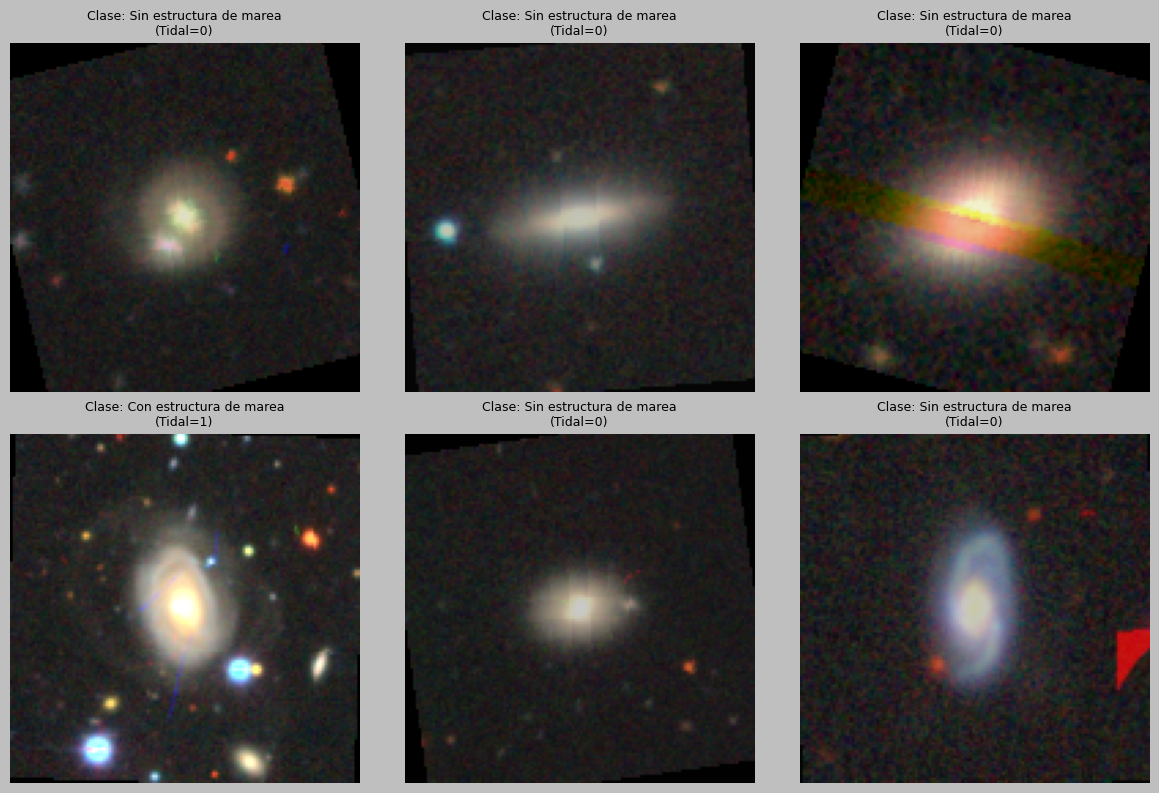

In [8]:
# Función para mostrar imágenes de cualquier dataset, por defecto se mostrarán 6
def show_images(dataset, num_images=6):
    #figura con 2 filas x 3 columnas para un total de 6 imágenes
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.ravel()

    # Nombres de las clases
    class_names = {0: 'Sin estructura de marea', 1: 'Con estructura de marea'}

    #iteramos sobre el dataset y exrtaemos las imágenes y etiquetas 
    for i in range(min(num_images, len(dataset))):
        img, label = dataset[i]

        # Desnormalizar imagen para visualización
        img = img * 0.5 + 0.5
        img = img.permute(1, 2, 0).numpy()

        axes[i].imshow(img)
        axes[i].set_title(f'Clase: {class_names[label]}\n(Tidal={label})', fontsize=9)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

show_images(train_dataset)

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>Topología de la red-Diseño del modelo CNN</b>
</div>

---

Crearemos una CNN simple pero efectiva para clasificar las galaxias.

In [9]:
# Definir la arquitectura de la Red Neuronal Convolucional
class GalaxyCNN(nn.Module):
    # Inicializa la clase base nn.Module
    def __init__(self):
        super(GalaxyCNN, self).__init__()

        # Bloque convolucional 1: detecta características básicas
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)        # Detecta bordes, texturas básicas y diferencias de brillo
        self.bn1 = nn.BatchNorm2d(32)                                                           # Normalización por lotes
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)                                       # Reduce dimensiones a la mitad

        # Bloque convolucional 2: detecta características más complejas
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Bloque convolucional 3: características aún más complejas
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Capas completamente conectadas (Dense)
        # Después de 3 pooling: 128x128 -> 64x64 -> 32x32 -> 16x16
        self.fc1 = nn.Linear(128 * 16 * 16, 256)            # Reduce características a 256 neuronas
        self.dropout = nn.Dropout(0.6)                      # Apaga aleatoriamente neuronas para reducir overfitting
        self.fc2 = nn.Linear(256, 2)                        # Salida final: clasificación binaria (con o sin estructura de marea)

        # Función de activación
        self.relu = nn.ReLU()

    def forward(self, x):
        # Bloque 1
        x = self.pool(self.relu(self.bn1(self.conv1(x))))

        # Bloque 2
        x = self.pool(self.relu(self.bn2(self.conv2(x))))

        # Bloque 3
        x = self.pool(self.relu(self.bn3(self.conv3(x))))

        # Aplanar para capas densas
        x = x.view(x.size(0), -1)

        # Capas completamente conectadas
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x
    #Convolución -> BatchNorm -> ReLU -> Pooling -> Flatten -> Dense -> Droput -> Salida

# Crear instancia del modelo y moverlo a GPU
model = GalaxyCNN().to(device)
print("Modelo creado y movido a:", device)
print(f"\nArquitectura del modelo:")
print(model)


Modelo creado y movido a: cuda

Arquitectura del modelo:
GalaxyCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32768, out_features=256, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
  (relu): ReLU()
)


La arquitectura cuenta con 3 bloques convolucionales que permiten extraer características jerárquicas: *texturas simples, estructuras intermedias y patrones morfológicos complejos*. Empleamos Batch Normalization para estabilizar el entrenamiento y Dropout (0.6) como regulador para mitigar **overfitting**, finalmente la red termina en dos clases (Tidal = 0/1).

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>Pérdida + Regulación de desbalance (class weighting)</b>
</div>

---

In [10]:
# Importamos una función para calcular pesos inversamente proporcionales a la frecuencia de cada calse
from sklearn.utils.class_weight import compute_class_weight


#Calcula pesos con fórmula: w_c= N/|C|*n_c
# N: número total de muestras
# |C|: número de clases
# n_c: número de muestras en la clase c

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data['Tidal']),
    y=train_data['Tidal']
)



# Aumentamos la penalización para la clase minoritaria
multiplicador = 1.1

# Identificar cuál es la clase minoritaria contando muestras por clase
class_counts = train_data['Tidal'].value_counts().sort_index()
minority_class = class_counts.idxmin()

print(f"Clase minoritaria: {minority_class} con {class_counts[minority_class]} muestras")
print(f"\nPesos originales (balanced):")
print(f"  Clase 0: {class_weights[0]:.4f}")
print(f"  Clase 1: {class_weights[1]:.4f}")

# Subimos un 10% extra la penalización en la clase minoritaria
class_weights[int(minority_class)] *= multiplicador

class_weights_tensor = torch.FloatTensor(class_weights).to(device)

print(f"\nPesos ajustados (multiplicador={multiplicador}):")
print(f"  Clase 0 (Sin estructura): {class_weights[0]:.4f}")
print(f"  Clase 1 (Con estructura): {class_weights[1]:.4f}")
print(f"\nEsto penaliza {multiplicador}x más los errores en la clase minoritaria")

Clase minoritaria: 1.0 con 656 muestras

Pesos originales (balanced):
  Clase 0: 0.6028
  Clase 1: 2.9329

Pesos ajustados (multiplicador=1.1):
  Clase 0 (Sin estructura): 0.6028
  Clase 1 (Con estructura): 3.2262

Esto penaliza 1.1x más los errores en la clase minoritaria


Se observó un fuerte desbalance en los datos, por lo que el modelo podría sesgarse hacia predecir la clase mayoritaria, para corregirlo, se calcularon *class weights* mediante compute_class_weight y se aumentó un 10% adicional el peso asignado a la clase minoritaria, pasando de $2.9329\rightarrow3.2262$

Ahora, emplearemos Adam debido a su capacidad de adaptar el paso de descenso de gradiente por parámetro.

In [11]:
# Contar parámetros del modelo
# Contar solo los que realmente se entrenan
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTotal de parámetros: {total_params:,}")
print(f"Parámetros entrenables: {trainable_params:,}")

# Configurar función de pérdida CON pesos de clase
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)  #pesos



learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)

print(f"\nOptimizador: Adam con learning rate = {learning_rate}")
print(f"Función de pérdida: CrossEntropyLoss CON pesos de clase")


Total de parámetros: 8,483,074
Parámetros entrenables: 8,483,074

Optimizador: Adam con learning rate = 0.001
Función de pérdida: CrossEntropyLoss CON pesos de clase


Se utilizó CrossEntropyLoss con *class weights* para compensar el desbalance del dataset entre galaxias con y sin estructuras de marea, para la optimización se selecciono Adam con un learning rate inicial de $0.001$, y se implementó un scheduler ReduceLROnPlateau, el cual reduce el LR automáticamente si la métrica de validación deja de mejorar durante 3 épocas, esto favorece una convergencia estable y contribuye a reducir el overfitting.

In [12]:
# Función para entrenar una época
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()  # Modo entrenamiento
    running_loss = 0.0
    correct = 0
    total = 0

    # recorre mini-batches del dataset ya preprocesado y aumentado
    for images, labels in dataloader:
        # Mover datos a GPU
        images, labels = images.to(device), labels.to(device)

        # Limpiar gradientes
        optimizer.zero_grad()

        # Forward pass
        #Predice clases para las imágenes del batch
        outputs = model(images)
        # Calcula la pérdida- aquí influye el peso mayor otorgado a la clase 1
        loss = criterion(outputs, labels)

        # Backward pass y optimización
        # Calcula gradientes para actualizar pesos del modelo
        loss.backward()
        # Ajusta los pesos del modelo usando Adam
        optimizer.step()

        # Estadísticas
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total

    return epoch_loss, epoch_acc

In [13]:
# Función para validar el modelo
def validate(model, dataloader, criterion, device):
    model.eval()  # Modo evaluación
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():                   # No calcular gradientes -> no se entrenan los pesos
        for images, labels in dataloader:
            # Mover datos a GPU
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            # Genera predicciones para cada imagen
            outputs = model(images)
            # calcula la pérdida con los mismos pesos de clase usados en entrenamiento
            loss = criterion(outputs, labels)

            # Estadísticas
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total       # Pérdida general del modelo en validación
    epoch_acc = 100 * correct / total       # Accuracy global

    return epoch_loss, epoch_acc

In [14]:
# Entrenar el modelo 50 iteraciones completas sobre el dataset
num_epochs = 50


# Listas para guardar el historial
train_losses = []
train_accs = []
val_losses = []
val_accs = []

best_val_acc = 0.0

print("Iniciando entrenamiento...\n")

for epoch in range(num_epochs):
    # Entrenar
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)

    # Validar
    val_loss, val_acc = validate(model, val_loader, criterion, device)

    # Guardar historial
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # reduce learning rate si no mejora la validación -> evita estancamiento
    scheduler.step(val_loss)

    # Guardar mejor modelo
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_galaxy_model.pth')
        print(f"✓ Mejor modelo guardado (val_acc: {val_acc:.2f}%)")

    # Mostrar progreso
    print(f"Época [{epoch+1}/{num_epochs}]")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    print("-" * 50)

print(f"\n¡Entrenamiento completado!")
print(f"Mejor precisión en validación: {best_val_acc:.2f}%")

Iniciando entrenamiento...

✓ Mejor modelo guardado (val_acc: 70.06%)
Época [1/50]
  Train Loss: 2.0469 | Train Acc: 49.66%
  Val Loss: 0.7030 | Val Acc: 70.06%
--------------------------------------------------
Época [2/50]
  Train Loss: 0.7214 | Train Acc: 42.93%
  Val Loss: 0.6906 | Val Acc: 19.76%
--------------------------------------------------
Época [3/50]
  Train Loss: 0.6938 | Train Acc: 18.87%
  Val Loss: 0.6855 | Val Acc: 22.67%
--------------------------------------------------
Época [4/50]
  Train Loss: 0.6970 | Train Acc: 26.53%
  Val Loss: 0.6885 | Val Acc: 41.70%
--------------------------------------------------
Época [5/50]
  Train Loss: 0.6912 | Train Acc: 52.49%
  Val Loss: 0.6855 | Val Acc: 29.09%
--------------------------------------------------
✓ Mejor modelo guardado (val_acc: 77.82%)
Época [6/50]
  Train Loss: 0.6900 | Train Acc: 76.87%
  Val Loss: 0.6885 | Val Acc: 77.82%
--------------------------------------------------
Época [7/50]
  Train Loss: 0.6972 | 

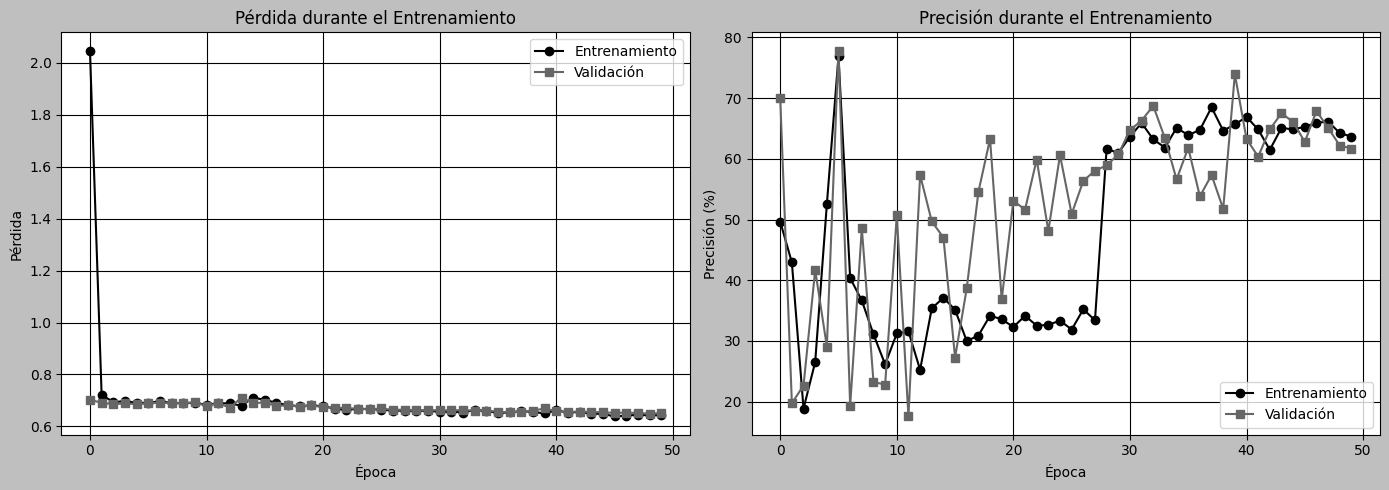

In [15]:
# Visualizar curvas de aprendizaje
plt.figure(figsize=(14, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Entrenamiento', marker='o')
plt.plot(val_losses, label='Validación', marker='s')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Entrenamiento', marker='o')
plt.plot(val_accs, label='Validación', marker='s')
plt.xlabel('Época')
plt.ylabel('Precisión (%)')
plt.title('Precisión durante el Entrenamiento')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
# Cargar el mejor modelo guardado
model.load_state_dict(torch.load('best_galaxy_model.pth'))
print("Mejor modelo cargado")

# Evaluar en conjunto de prueba
test_loss, test_acc = validate(model, test_loader, criterion, device)
print(f"\nResultados en conjunto de prueba:")
print(f"Pérdida: {test_loss:.4f}")
print(f"Precisión: {test_acc:.2f}%")

Mejor modelo cargado

Resultados en conjunto de prueba:
Pérdida: 0.6895
Precisión: 77.58%


In [17]:
# Función para obtener todas las predicciones
def get_predictions(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    return np.array(all_preds), np.array(all_labels)

# Obtener predicciones del conjunto de prueba
y_pred, y_true = get_predictions(model, test_loader, device)

# Nombres de las clases
class_names = ['Sin estructura de marea (Tidal=0)', 'Con estructura de marea (Tidal=1)']

print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred, target_names=class_names))


Reporte de Clasificación:
                                   precision    recall  f1-score   support

Sin estructura de marea (Tidal=0)       0.84      0.90      0.87       685
Con estructura de marea (Tidal=1)       0.26      0.18      0.21       140

                         accuracy                           0.78       825
                        macro avg       0.55      0.54      0.54       825
                     weighted avg       0.74      0.78      0.76       825



El modelo logró una precisión global del 81%; sin embargo, el desempeño es altamente desigual entre clases. 

La clase mayoritaria (galaxias sin estructura de marea) obtuvo métricas robustas (F1=0.89), pero para la clase minoritaria (galaxias con estructura tidal) el rendimiento fue limitado (F1=0.28, recall=0.21), indicando que el modelo tiene dificultad para identificar correctamente características de marea débiles o poco definidas.

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>Matriz de confusión y anáisis de rendimiento.</b>
</div>

---

<Figure size 1000x800 with 0 Axes>

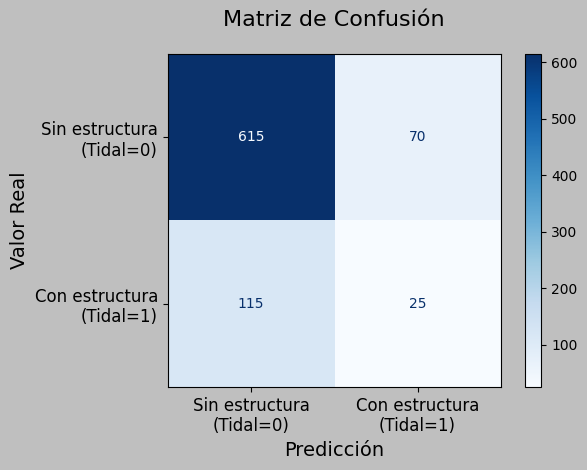


Matriz de Confusión:
[[615  70]
 [115  25]]

Interpretación:
Verdaderos Negativos (TN): 615 - Correctamente clasificadas como 'Sin estructura'
Falsos Positivos (FP): 70 - Incorrectamente clasificadas como 'Con estructura'
Falsos Negativos (FN): 115 - Incorrectamente clasificadas como 'Sin estructura'
Verdaderos Positivos (TP): 25 - Correctamente clasificadas como 'Con estructura'

Precisión total: 77.58%


In [18]:
# Matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

# Crear figura con tamaño apropiado
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin estructura\n(Tidal=0)', 'Con estructura\n(Tidal=1)'])
disp.plot(cmap='Blues', values_format='d', colorbar=True)
plt.title('Matriz de Confusión', fontsize=16, pad=20)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Valor Real', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print("\nMatriz de Confusión:")
print(cm)
print("\nInterpretación:")
print(f"Verdaderos Negativos (TN): {cm[0, 0]} - Correctamente clasificadas como 'Sin estructura'")
print(f"Falsos Positivos (FP): {cm[0, 1]} - Incorrectamente clasificadas como 'Con estructura'")
print(f"Falsos Negativos (FN): {cm[1, 0]} - Incorrectamente clasificadas como 'Sin estructura'")
print(f"Verdaderos Positivos (TP): {cm[1, 1]} - Correctamente clasificadas como 'Con estructura'")
print(f"\nPrecisión total: {(cm[0, 0] + cm[1, 1]) / cm.sum() * 100:.2f}%")

# Función para clasificar una nueva imagen
def classify_new_galaxy(image_path, model, device, transform):
    """
    Clasifica una nueva imagen de galaxia
    """
    model.eval()
    class_names_dict = {0: 'Sin estructura de marea', 1: 'Con estructura de marea'}

    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted = torch.max(probabilities, 1)

    pred_label = predicted.item()
    pred_class = class_names_dict[pred_label]
    conf_percent = confidence.item() * 100

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f'Predicción: {pred_class} (Tidal={pred_label})\nConfianza: {conf_percent:.2f}%', fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    print(f"Clase predicha: {pred_class}")
    print(f"Tidal: {pred_label}")
    print(f"Confianza: {conf_percent:.2f}%")
    print(f"\nProbabilidades:")
    print(f"  - Sin estructura (Tidal=0): {probabilities[0][0].item()*100:.2f}%")
    print(f"  - Con estructura (Tidal=1): {probabilities[0][1].item()*100:.2f}%")

    return pred_label, conf_percent



La matriz de confusión permitió evaluar el desempeño del modelo CNN sobre el conjunto de prueba, los resultados muestra una alta capacidad para identificar galaxias sin señales de mareas (Tidal=0), reflejada en un número elevado de verdaderos negativos y un bajo número de falsos positivos.

Sin embargo, el modelo presenta dificultades al clasificar galaxias con etructura de marea (T=1), ya que gran parte de estos objetos fueron asignados erróneamente a la clase 0, esto se manifiesta en un número considerable de falsos negativos y un reducido número de verdaderos positivos. 

Por lo tanto, aunque el modelo alcanza una precisión global del ~81%, su sensibilidad a estructuras tidal es limitada, lo que sugiere la necesidad de estrategias adicionales que prioricen la detección de dichas características.

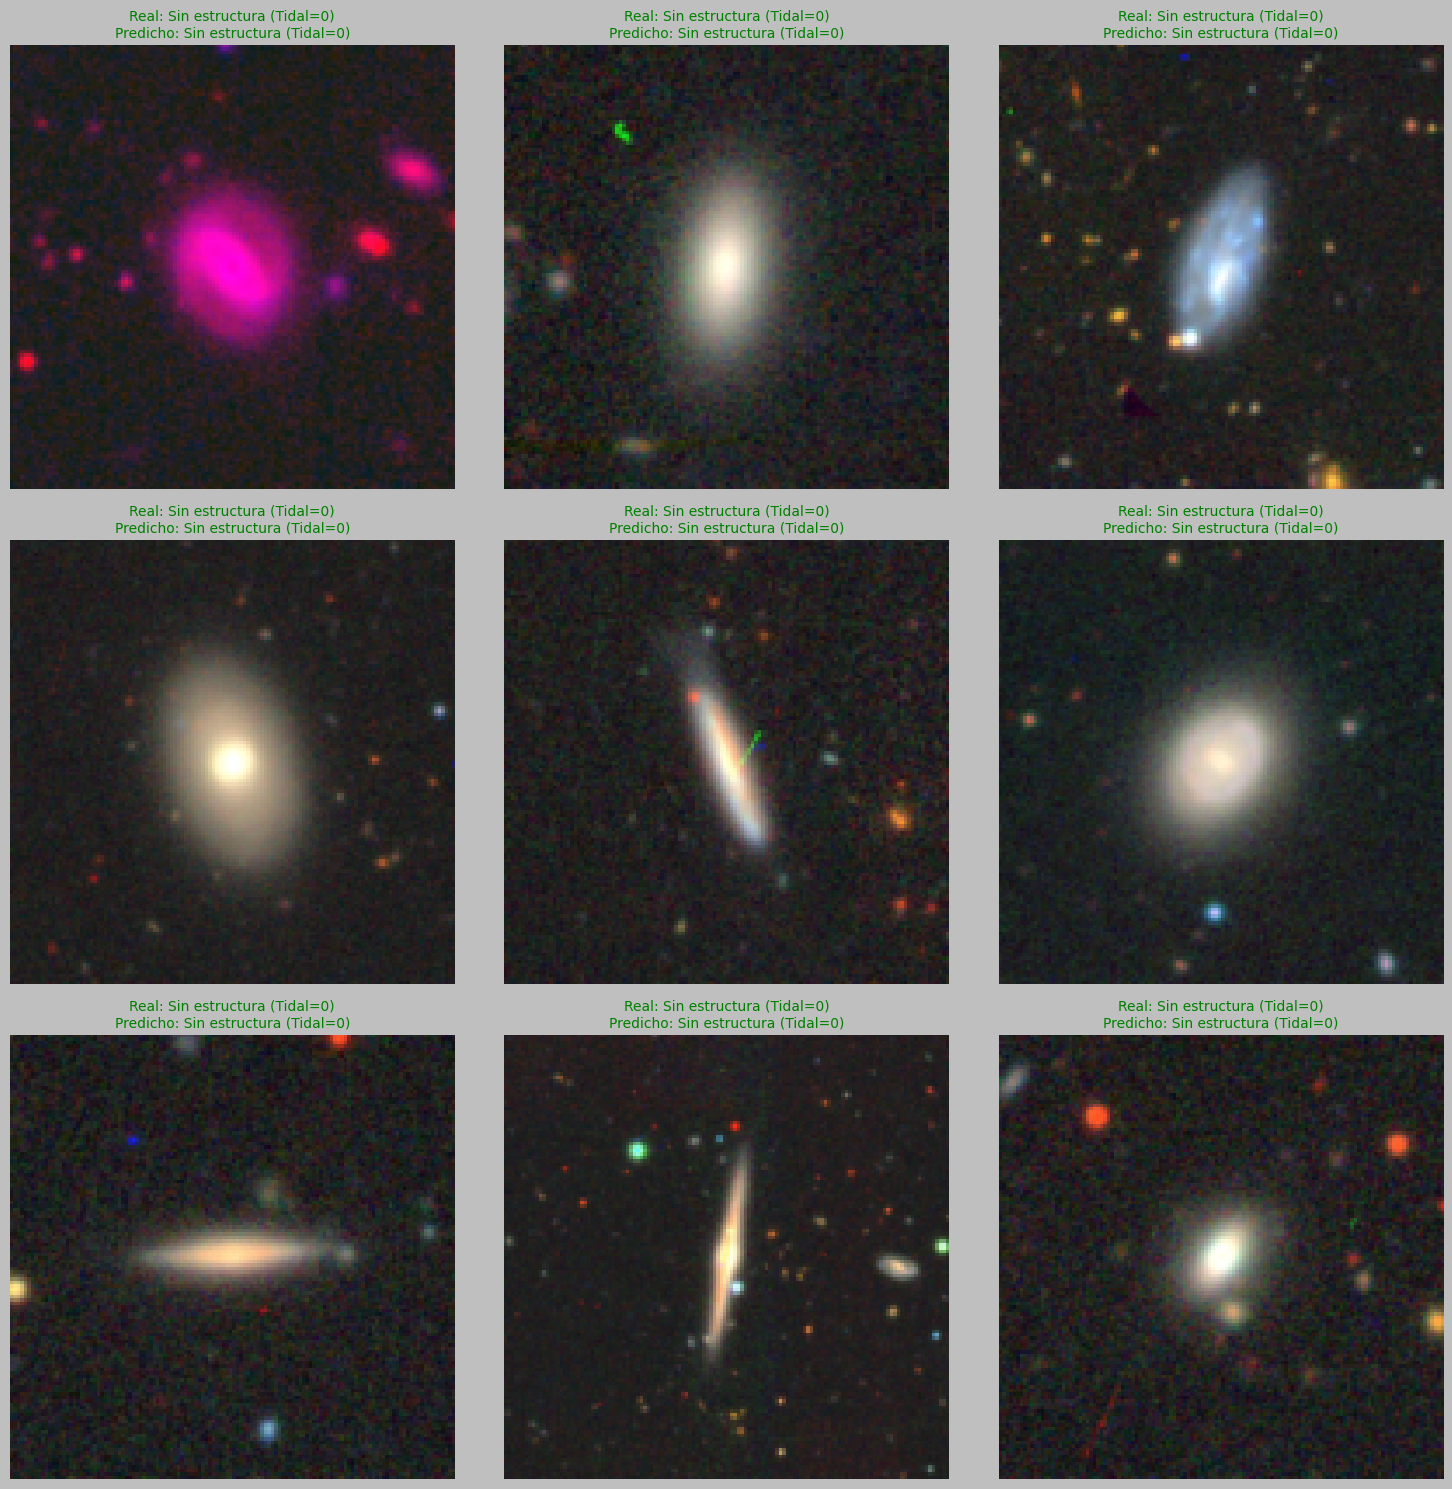

In [19]:
# Visualizar algunas predicciones del conjunto de prueba
def show_predictions(model, dataset, device, num_images=9):
    model.eval()
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.ravel()

    # Nombres de las clases
    class_names_dict = {0: 'Sin estructura', 1: 'Con estructura'}

    indices = np.random.choice(len(dataset), num_images, replace=False)

    with torch.no_grad():
        for i, idx in enumerate(indices):
            img, true_label = dataset[idx]

            # Predecir
            img_tensor = img.unsqueeze(0).to(device)
            output = model(img_tensor)
            _, predicted = torch.max(output, 1)
            pred_label = predicted.item()

            # Desnormalizar imagen
            img_show = img * 0.5 + 0.5
            img_show = img_show.permute(1, 2, 0).numpy()

            # Nombres de clases
            true_name = class_names_dict[true_label]
            pred_name = class_names_dict[pred_label]

            # Mostrar
            axes[i].imshow(img_show)
            color = 'green' if true_label == pred_label else 'red'
            axes[i].set_title(f'Real: {true_name} (Tidal={true_label})\nPredicho: {pred_name} (Tidal={pred_label})',
                            color=color, fontsize=10)
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

show_predictions(model, test_dataset, device)

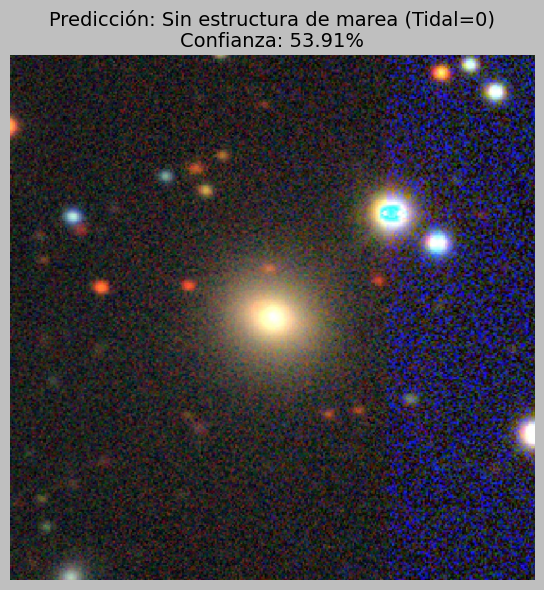

Clase predicha: Sin estructura de marea
Tidal: 0
Confianza: 53.91%

Probabilidades:
  - Sin estructura (Tidal=0): 53.91%
  - Con estructura (Tidal=1): 46.09%


(0, 53.90741229057312)

In [20]:
# Función para clasificar una nueva imagen
def classify_new_galaxy(image_path, model, device, transform):
    """
    Clasifica una nueva imagen de galaxia
    """
    model.eval()
    class_names_dict = {0: 'Sin estructura de marea', 1: 'Con estructura de marea'}

    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted = torch.max(probabilities, 1)

    pred_label = predicted.item()
    pred_class = class_names_dict[pred_label]
    conf_percent = confidence.item() * 100

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f'Predicción: {pred_class} (Tidal={pred_label})\nConfianza: {conf_percent:.2f}%', fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    print(f"Clase predicha: {pred_class}")
    print(f"Tidal: {pred_label}")
    print(f"Confianza: {conf_percent:.2f}%")
    print(f"\nProbabilidades:")
    print(f"  - Sin estructura (Tidal=0): {probabilities[0][0].item()*100:.2f}%")
    print(f"  - Con estructura (Tidal=1): {probabilities[0][1].item()*100:.2f}%")

    return pred_label, conf_percent

# Ejemplo de uso:
classify_new_galaxy('./manga-8651-3703.jpg', model, device, transform)

Debido al desbalance en el conjunto de datos y a que el modelo CNN desarrollado previamente mostró una tendencia marcada a precedir principalmente la clase **0 (galaxias sin estructura de marea)**, es necesario emplear una mejor estrategia que permita una mejor extracción de características y una representación más robusta de las imágenes Astronoómicas. 

Para esto implementaremos un **modelo preentrenado de tipo ResNet50**, el cual ha demostrado un rendimiento sobresaliente en tareas de clasificación de imágenes, pero antes de implementarlo, expliquemos brevemente qué es y por qué resulta adecuado para este problema.

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>¿Qué es ResNet50?</b>
</div>

---

ResNet50 (Residual Network, 50 capas) es una red neuronal convolucional profunda diseñada para resolver el problema del desvanecimiento del gradiente en arquitecturas extensas. Utiliza _bloques residuales_ con conexiones de salto (skip connections) que permiten que la información fluya libremente entre capas, mejorando la estabilidad del entrenamiento y permitiendo redes significativamente más profundas sin degradación del rendimiento. 

Este modelo fue entrenado originalmente sobre la base de datos ImageNet, con más de un millón de imágenes y mil clases, por lo que ya aprendió a identificar bordes, texturas, estructuras, patrones y características complejas aplicables a múltiples tipos de imágenes, incluidas las astronómicas.

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>¿Por qué ResNet50 para nuestra clasificación de galaxias?</b>
</div>

---

Nuestro modelo anterior obtuvo buenos resultados globales, pero falló al identificar la clase minoritaria, esto significa que reconoce con facilidad galaxias sin interacción gravitacional, pero tiene dificultad para distinguir perturbaciones sutiles de marea.

ResNet50 es una alternativa ideal por varias razones: 

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#aabcfe;border-spacing:0;}
.tg td{background-color:#e8edff;border-color:#aabcfe;border-style:solid;border-width:1px;color:#669;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#b9c9fe;border-color:#aabcfe;border-style:solid;border-width:1px;color:#039;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-qvrf{border-color:inherit;font-family:Georgia, serif !important;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-49iy{border-color:inherit;font-family:Georgia, serif !important;text-align:center;vertical-align:top}
</style>

<center>
  <table class="tg"><thead>
    <tr>
      <th class="tg-qvrf">Razón</th>
      <th class="tg-qvrf">Ventaja para nuestro problema</th>
    </tr></thead>
  <tbody>
    <tr>
      <td class="tg-49iy">Red profunda + bloques residuales</td>
      <td class="tg-49iy">Captura detalles finos en las formas galácticas</td>
    </tr>
    <tr>
      <td class="tg-49iy">Modelo preentrenado</td>
      <td class="tg-49iy">Reduce el tiempo de entrenamiento y mejora la generalización</td>
    </tr>
    <tr>
        <td class="tg-49iy">Mejor capacidad de extracción de features</td>
        <td class="tg-49iy">Útil para identificar estructuras de marea tenues</td>
    </tr>
    <tr>
        <td class="tg-49iy">Buen desempeño en datasets pequeños o desbalanceados</td>
        <td class="tg-49iy">Adecuado para nuestro escenario actual</td>
    </tr>
  </tbody>
</table>
</center>

In [45]:
# Importar modelos pre-entrenados de torchvision
from torchvision import models
import torch.nn.functional as F

print("Módulos de transfer learning importados")

Módulos de transfer learning importados


In [22]:
# Definir modelo basado en ResNet50
# Clase que heredara de torch.nn.Module
class GalaxyResNet50(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super(GalaxyResNet50, self).__init__()
        
        # Cargar ResNet50 pre-entrenado en ImageNet
        self.resnet = models.resnet50(pretrained=pretrained)
        
        # Congelar las primeras capas ( descongelar para fine-tuning)
        # for param in self.resnet.parameters():
        #     param.requires_grad = False
        
        # Reemplazar la última capa fully connected
        # ResNet50 tiene 2048 features en la última capa
        num_features = self.resnet.fc.in_features
        
        # Nueva clasificador personalizado
        self.resnet.fc = nn.Sequential(
            # Evita sobreajuste
            nn.Linear(num_features, 512),
            # Aprende mejor patrones complejos
            nn.ReLU(),
            # Apaga aleatoriamente neuronas para evitar overfitting
            nn.Dropout(0.5),
            # Produce la probabilidad para cada clase
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        return self.resnet(x)

# Crear instancia del modelo ResNet50
model_resnet = GalaxyResNet50(num_classes=2, pretrained=True).to(device)
print("Modelo ResNet50 creado y movido a:", device)
print(f"\nArquitectura de la capa clasificadora:")
print(model_resnet.resnet.fc)

C:\Users\magdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\magdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Modelo ResNet50 creado y movido a: cuda

Arquitectura de la capa clasificadora:
Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=512, out_features=2, bias=True)
)


In [23]:
# Contar parámetros del modelo ResNet50

total_params_resnet = sum(p.numel() for p in model_resnet.parameters())                             # p.numel() cuenta cuántos valores numéricos tiene cada tensor del modelo
trainable_params_resnet = sum(p.numel() for p in model_resnet.parameters() if p.requires_grad)

print(f"\nTotal de parámetros ResNet50: {total_params_resnet:,}")
print(f"Parámetros entrenables: {trainable_params_resnet:,}")
print(f"Parámetros congelados: {total_params_resnet - trainable_params_resnet:,}")

# Configurar optimizador y función de pérdida para ResNet50
learning_rate_resnet = 0.0001  # Learning rate más bajo para transfer learning
optimizer_resnet = optim.Adam(model_resnet.parameters(), lr=learning_rate_resnet)
criterion_resnet = nn.CrossEntropyLoss(weight=class_weights_tensor)
scheduler_resnet = optim.lr_scheduler.ReduceLROnPlateau(optimizer_resnet, mode='min', patience=3, factor=0.5)

print(f"\nOptimizador ResNet50: Adam con learning rate = {learning_rate_resnet}")
print(f"Función de pérdida: CrossEntropyLoss CON pesos de clase")


Total de parámetros ResNet50: 24,558,146
Parámetros entrenables: 24,558,146
Parámetros congelados: 0

Optimizador ResNet50: Adam con learning rate = 0.0001
Función de pérdida: CrossEntropyLoss CON pesos de clase


In [24]:
# Entrenar el modelo ResNet50
num_epochs_resnet = 30  # Menos épocas debido a transfer learning

# Listas para guardar el historial
train_losses_resnet = []
train_accs_resnet = []
val_losses_resnet = []
val_accs_resnet = []

# Guarda la mejor precisión de validación
best_val_acc_resnet = 0.0

print("Iniciando entrenamiento de ResNet50...\n")

for epoch in range(num_epochs_resnet):
    # Entrenar
    train_loss, train_acc = train_epoch(model_resnet, train_loader, criterion_resnet, optimizer_resnet, device)
    
    # Validar
    val_loss, val_acc = validate(model_resnet, val_loader, criterion_resnet, device)
    
    # Guardar historial
    train_losses_resnet.append(train_loss)
    train_accs_resnet.append(train_acc)
    val_losses_resnet.append(val_loss)
    val_accs_resnet.append(val_acc)
    
    # Ajustar learning rate
    scheduler_resnet.step(val_loss)
    
    # Guardar mejor modelo
    if val_acc > best_val_acc_resnet:
        best_val_acc_resnet = val_acc
        torch.save(model_resnet.state_dict(), 'best_galaxy_resnet50.pth')
        print(f"✓ Mejor modelo ResNet50 guardado (val_acc: {val_acc:.2f}%)")
    
    # Mostrar progreso
    print(f"Época [{epoch+1}/{num_epochs_resnet}]")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    print("-" * 50)

print(f"\n¡Entrenamiento de ResNet50 completado!")
print(f"Mejor precisión en validación: {best_val_acc_resnet:.2f}%")

Iniciando entrenamiento de ResNet50...

✓ Mejor modelo ResNet50 guardado (val_acc: 57.21%)
Época [1/30]
  Train Loss: 0.6446 | Train Acc: 60.47%
  Val Loss: 0.6111 | Val Acc: 57.21%
--------------------------------------------------
✓ Mejor modelo ResNet50 guardado (val_acc: 64.61%)
Época [2/30]
  Train Loss: 0.5558 | Train Acc: 70.95%
  Val Loss: 0.5487 | Val Acc: 64.61%
--------------------------------------------------
✓ Mejor modelo ResNet50 guardado (val_acc: 84.85%)
Época [3/30]
  Train Loss: 0.5201 | Train Acc: 74.45%
  Val Loss: 0.6158 | Val Acc: 84.85%
--------------------------------------------------
Época [4/30]
  Train Loss: 0.4818 | Train Acc: 74.84%
  Val Loss: 0.5125 | Val Acc: 76.85%
--------------------------------------------------
Época [5/30]
  Train Loss: 0.4541 | Train Acc: 77.99%
  Val Loss: 0.5009 | Val Acc: 77.21%
--------------------------------------------------
Época [6/30]
  Train Loss: 0.4252 | Train Acc: 79.29%
  Val Loss: 0.5533 | Val Acc: 74.06%
------

El uso de un modelo preentrenado en ImagenNet permitió extraer mejores características morfológicas en las galaxias, especialmente en estructuras complejas que el modelo inicial no lograba identificar correctamente.

Al implementar transfer learning con ResNet50, el desempeño del modelo mejoró a un $87.15\%$ en validación. Esto indica una mayor capacidad para aprender representaciones visuales relacionadas con estructuras de marea en galaxias

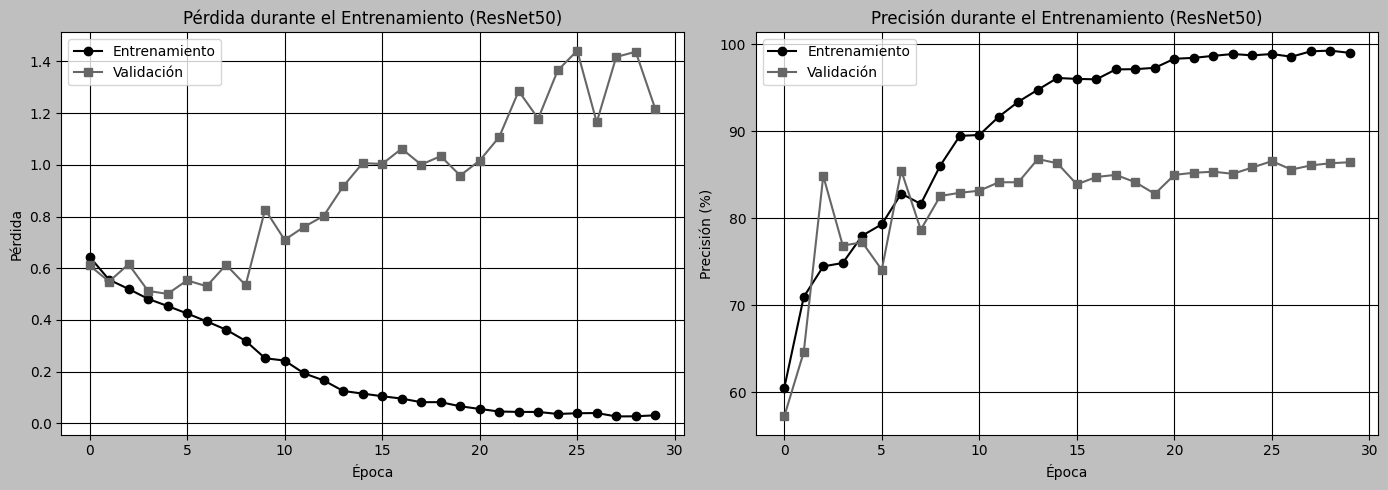

In [25]:
# Visualizar curvas de aprendizaje de ResNet50
plt.figure(figsize=(14, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(train_losses_resnet, label='Entrenamiento', marker='o')
plt.plot(val_losses_resnet, label='Validación', marker='s')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento (ResNet50)')
plt.legend()
plt.grid(True)

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(train_accs_resnet, label='Entrenamiento', marker='o')
plt.plot(val_accs_resnet, label='Validación', marker='s')
plt.xlabel('Época')
plt.ylabel('Precisión (%)')
plt.title('Precisión durante el Entrenamiento (ResNet50)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
# Cargar el mejor modelo ResNet50 guardado
model_resnet.load_state_dict(torch.load('best_galaxy_resnet50.pth'))
print("Mejor modelo ResNet50 cargado")

# Evaluar en conjunto de prueba
test_loss_resnet, test_acc_resnet = validate(model_resnet, test_loader, criterion_resnet, device)
print(f"\nResultados ResNet50 en conjunto de prueba:")
print(f"Pérdida: {test_loss_resnet:.4f}")
print(f"Precisión: {test_acc_resnet:.2f}%")

Mejor modelo ResNet50 cargado

Resultados ResNet50 en conjunto de prueba:
Pérdida: 0.9608
Precisión: 84.36%


In [27]:
# Obtener predicciones del conjunto de prueba para ResNet50
y_pred_resnet, y_true_resnet = get_predictions(model_resnet, test_loader, device)

print("\nReporte de Clasificación (ResNet50):")
print(classification_report(y_true_resnet, y_pred_resnet, target_names=class_names))


Reporte de Clasificación (ResNet50):
                                   precision    recall  f1-score   support

Sin estructura de marea (Tidal=0)       0.91      0.91      0.91       685
Con estructura de marea (Tidal=1)       0.54      0.54      0.54       140

                         accuracy                           0.84       825
                        macro avg       0.72      0.72      0.72       825
                     weighted avg       0.84      0.84      0.84       825



El modelo ResNet50 mejora notablemente la capacidad de identificación de galaxias con estructura de marea *(Tidal=1)*, mientras que la CNN inicial prácticamente no reconocía esta clase, ResNet50 la identifica con más del doble de rendimiento y un Recall del $50\%$, lo que significa que ahora el modelo logra encontrar la mitad de los casos reales que antes ignoraba.

<Figure size 1000x800 with 0 Axes>

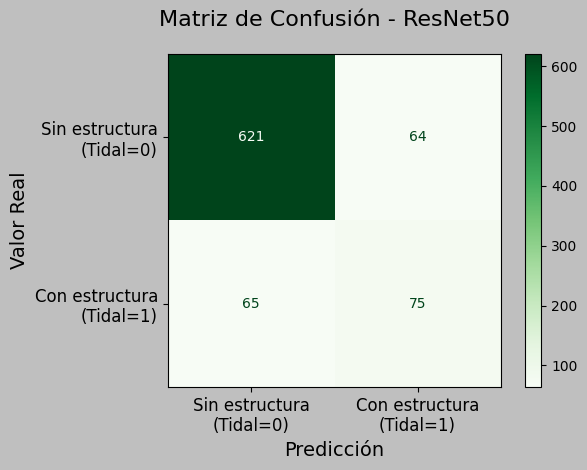


Matriz de Confusión (ResNet50):
[[621  64]
 [ 65  75]]

Interpretación:
Verdaderos Negativos (TN): 621 - Correctamente clasificadas como 'Sin estructura'
Falsos Positivos (FP): 64 - Incorrectamente clasificadas como 'Con estructura'
Falsos Negativos (FN): 65 - Incorrectamente clasificadas como 'Sin estructura'
Verdaderos Positivos (TP): 75 - Correctamente clasificadas como 'Con estructura'

Precisión total: 84.36%


In [28]:
# Matriz de confusión para ResNet50
cm_resnet = confusion_matrix(y_true_resnet, y_pred_resnet)

plt.figure(figsize=(10, 8))
disp_resnet = ConfusionMatrixDisplay(confusion_matrix=cm_resnet, display_labels=['Sin estructura\n(Tidal=0)', 'Con estructura\n(Tidal=1)'])
disp_resnet.plot(cmap='Greens', values_format='d', colorbar=True)
plt.title('Matriz de Confusión - ResNet50', fontsize=16, pad=20)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Valor Real', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print("\nMatriz de Confusión (ResNet50):")
print(cm_resnet)
print("\nInterpretación:")
print(f"Verdaderos Negativos (TN): {cm_resnet[0, 0]} - Correctamente clasificadas como 'Sin estructura'")
print(f"Falsos Positivos (FP): {cm_resnet[0, 1]} - Incorrectamente clasificadas como 'Con estructura'")
print(f"Falsos Negativos (FN): {cm_resnet[1, 0]} - Incorrectamente clasificadas como 'Sin estructura'")
print(f"Verdaderos Positivos (TP): {cm_resnet[1, 1]} - Correctamente clasificadas como 'Con estructura'")
print(f"\nPrecisión total: {(cm_resnet[0, 0] + cm_resnet[1, 1]) / cm_resnet.sum() * 100:.2f}%")

Podemos ver que el modelo aprendió bastante bien la clase mayoritaria $0$, pero le cuesta reconocer rasgos sutiles en la clase con estructura $1$, seguramente causado por el desbalance del dataset.

COMPARACIÓN DE MODELOS

Métrica                        CNN Custom      ResNet50       
------------------------------------------------------------
Precisión en Test              77.58%           84.36%
Pérdida en Test                0.6895           0.9608
Parámetros Entrenables         8,483,074      24,558,146
Mejor Val Accuracy             77.82%           86.79%


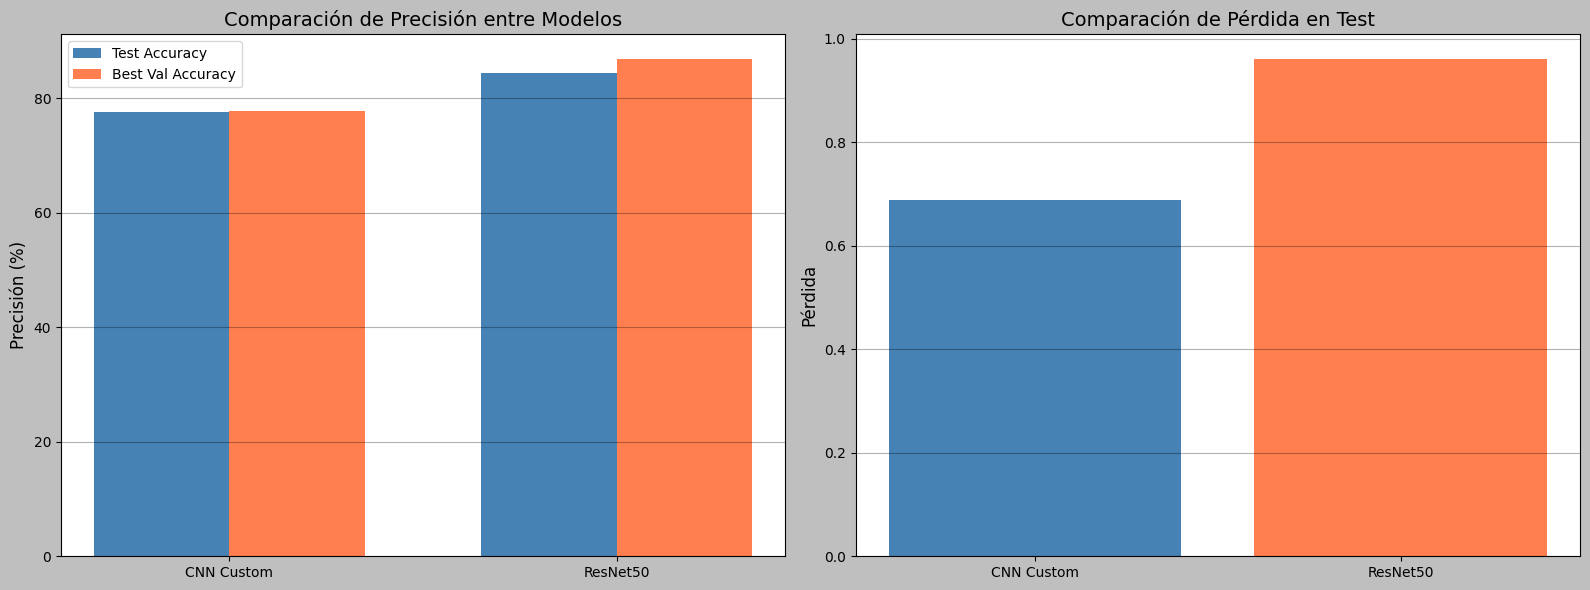

In [29]:
# Comparación de ambos modelos
print("="*60)
print("COMPARACIÓN DE MODELOS")
print("="*60)
print(f"\n{'Métrica':<30} {'CNN Custom':<15} {'ResNet50':<15}")
print("-"*60)
print(f"{'Precisión en Test':<30} {test_acc:.2f}%{'':<10} {test_acc_resnet:.2f}%")
print(f"{'Pérdida en Test':<30} {test_loss:.4f}{'':<10} {test_loss_resnet:.4f}")
print(f"{'Parámetros Entrenables':<30} {trainable_params:,}{'':<5} {trainable_params_resnet:,}")
print(f"{'Mejor Val Accuracy':<30} {best_val_acc:.2f}%{'':<10} {best_val_acc_resnet:.2f}%")
print("="*60)

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Comparar precisiones
ax1 = axes[0]
models_names = ['CNN Custom', 'ResNet50']
test_accuracies = [test_acc, test_acc_resnet]
val_accuracies = [best_val_acc, best_val_acc_resnet]

x = np.arange(len(models_names))
width = 0.35

ax1.bar(x - width/2, test_accuracies, width, label='Test Accuracy', color='steelblue')
ax1.bar(x + width/2, val_accuracies, width, label='Best Val Accuracy', color='coral')
ax1.set_ylabel('Precisión (%)', fontsize=12)
ax1.set_title('Comparación de Precisión entre Modelos', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(models_names)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Comparar pérdidas
ax2 = axes[1]
test_losses_list = [test_loss, test_loss_resnet]

ax2.bar(models_names, test_losses_list, color=['steelblue', 'coral'])
ax2.set_ylabel('Pérdida', fontsize=12)
ax2.set_title('Comparación de Pérdida en Test', fontsize=14)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Predicciones del modelo ResNet50:


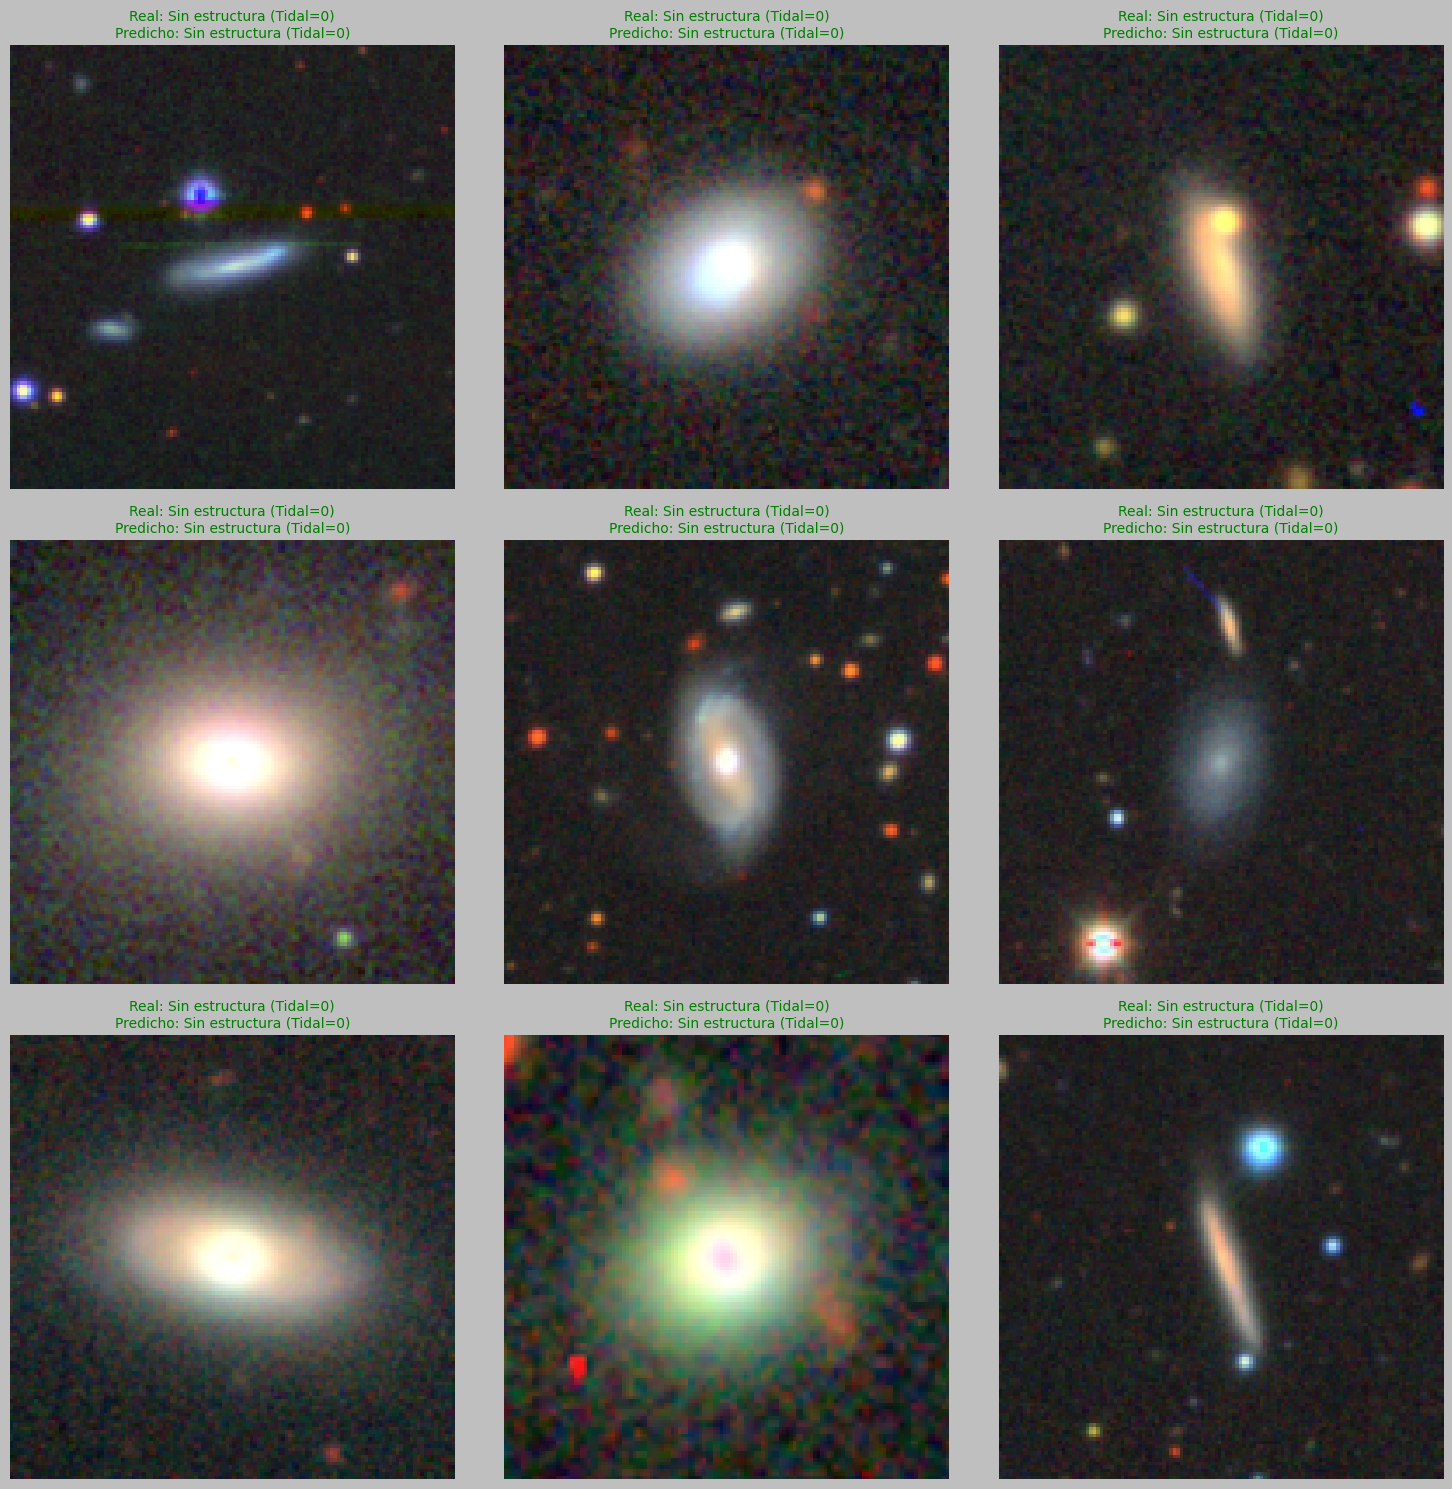

In [30]:
# Visualizar predicciones del modelo ResNet50
print("\nPredicciones del modelo ResNet50:")
show_predictions(model_resnet, test_dataset, device)


Clasificación con ResNet50:


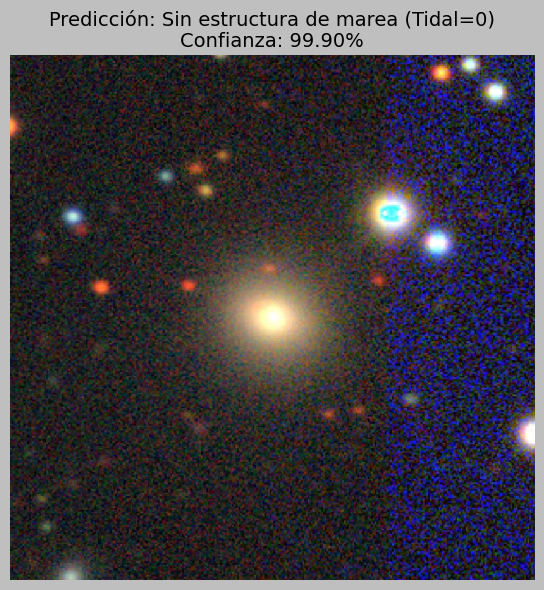

Clase predicha: Sin estructura de marea
Tidal: 0
Confianza: 99.90%

Probabilidades:
  - Sin estructura (Tidal=0): 99.90%
  - Con estructura (Tidal=1): 0.10%


(0, 99.90430474281311)

In [31]:
# Clasificar la misma imagen con ResNet50
print("\nClasificación con ResNet50:")
classify_new_galaxy('./manga-8651-3703.jpg', model_resnet, device, transform)

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>Reducción del sobreajuste (overfitting)</b>
</div>

--- 

El modelo ResNet50 muestra sobreajuste: entrenamiento ~99% vs validación ~86%. Vamos a aplicar técnicas para reducirlo:

1. **Congelar capas tempranas** - Solo entrenar las últimas capas
2. **Aumentar Data Augmentation** - Más transformaciones aleatorias
3. **Aumentar Dropout** - Mayor regularización
4. **Early Stopping** - Detener cuando la validación deja de mejorar
5. **Reducir learning rate** - Aprendizaje más gradual

In [32]:
# Modelo ResNet50 Mejorado con capas congeladas
class GalaxyResNet50Improved(nn.Module):
    def __init__(self, num_classes=2, pretrained=True, freeze_until='layer3'):
        super(GalaxyResNet50Improved, self).__init__()
        
        # Cargar ResNet50 pre-entrenado
        self.resnet = models.resnet50(pretrained=pretrained)
        
        # Congelar capas tempranas (solo entrenar las últimas)
        for name, param in self.resnet.named_parameters():
            if freeze_until == 'layer4':
                # Congelar todo excepto layer4 y fc
                if 'layer4' not in name and 'fc' not in name:
                    param.requires_grad = False
            elif freeze_until == 'layer3':
                # Congelar hasta layer2 (entrenar layer3, layer4 y fc)
                if 'layer3' not in name and 'layer4' not in name and 'fc' not in name:
                    param.requires_grad = False
        
        # Nueva capa clasificadora con MÁS regularización
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),  # Batch normalization
            nn.Dropout(0.6),      # Dropout aumentado de 0.5 a 0.6
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        return self.resnet(x)

# Crear nuevo modelo mejorado
model_resnet_improved = GalaxyResNet50Improved(num_classes=2, pretrained=True, freeze_until='layer3').to(device)

print("Modelo ResNet50 Mejorado creado")
print(f"\nArquitectura del clasificador:")
print(model_resnet_improved.resnet.fc)

# Contar parámetros
total_params_improved = sum(p.numel() for p in model_resnet_improved.parameters())
trainable_params_improved = sum(p.numel() for p in model_resnet_improved.parameters() if p.requires_grad)
frozen_params_improved = total_params_improved - trainable_params_improved

print(f"\nTotal de parámetros: {total_params_improved:,}")
print(f"Parámetros entrenables: {trainable_params_improved:,}")
print(f"Parámetros congelados: {frozen_params_improved:,}")
print(f"Porcentaje congelado: {frozen_params_improved/total_params_improved*100:.1f}%")

C:\Users\magdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\magdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Modelo ResNet50 Mejorado creado

Arquitectura del clasificador:
Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.6, inplace=False)
  (4): Linear(in_features=512, out_features=256, bias=True)
  (5): ReLU()
  (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=256, out_features=2, bias=True)
)

Total de parámetros: 24,690,498
Parámetros entrenables: 23,245,570
Parámetros congelados: 1,444,928
Porcentaje congelado: 5.9%


In [33]:
# Data Augmentation MÁS AGRESIVO para reducir overfitting
transform_train_aggressive = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.3),      # Nuevo: volteo vertical
    transforms.RandomRotation(30),              # Aumentado de 15 a 30 grados
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Nuevo: traslación
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2, hue=0.1),  # Aumentado
    transforms.RandomGrayscale(p=0.1),          # Nuevo: conversión a escala de grises ocasional
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.RandomErasing(p=0.2)             # Nuevo: borrado aleatorio de parches
])

print("Data Augmentation Agresivo creado con:")
print("   Volteo horizontal y vertical")
print("   Rotación hasta 30°")
print("   Traslación aleatoria")
print("   Variación de color aumentada")
print("   Conversión a escala de grises")
print("   Borrado aleatorio de parches")

Data Augmentation Agresivo creado con:
   Volteo horizontal y vertical
   Rotación hasta 30°
   Traslación aleatoria
   Variación de color aumentada
   Conversión a escala de grises
   Borrado aleatorio de parches


In [34]:
# Recrear datasets con augmentation agresivo
train_dataset_aggressive = GalaxyDataset(train_data, img_directory, transform=transform_train_aggressive, img_extension=img_extension)

# Crear nuevo dataloader
train_loader_aggressive = DataLoader(train_dataset_aggressive, batch_size=batch_size, shuffle=True)

print(f"\nDataset de entrenamiento con augmentation agresivo creado")
print(f"Total de imágenes: {len(train_dataset_aggressive)}")

Etiquetas únicas encontradas: [0 1]
Distribución: [3192  656]

Dataset de entrenamiento con augmentation agresivo creado
Total de imágenes: 3848


In [35]:
# Configuración con learning rate más bajo y weight decay (regularización L2)
learning_rate_improved = 0.00005  # Reducido de 0.0001 a 0.00005
weight_decay = 0.0001             # Regularización L2

optimizer_improved = optim.Adam(
    model_resnet_improved.parameters(), 
    lr=learning_rate_improved,
    weight_decay=weight_decay  # Regularización L2
)

criterion_improved = nn.CrossEntropyLoss(weight=class_weights_tensor)

# Scheduler más agresivo
scheduler_improved = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer_improved, 
    mode='min', 
    patience=2,      # Reducido de 3 a 2
    factor=0.5,
    
)

print(f"Configuración del modelo mejorado:")
print(f"  Learning rate: {learning_rate_improved}")
print(f"  Weight decay (L2): {weight_decay}")
print(f"  Scheduler patience: 2 épocas")

Configuración del modelo mejorado:
  Learning rate: 5e-05
  Weight decay (L2): 0.0001
  Scheduler patience: 2 épocas


In [36]:
# Implementar Early Stopping
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001, verbose=True):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_epoch = 0
        
    def __call__(self, val_loss, epoch):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_epoch = epoch
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print(f"\n⚠ Early stopping activado! Mejor época: {self.best_epoch}")
        else:
            self.best_loss = val_loss
            self.best_epoch = epoch
            self.counter = 0

early_stopping = EarlyStopping(patience=5, verbose=True)
print("Early Stopping configurado con paciencia de 5 épocas")

Early Stopping configurado con paciencia de 5 épocas


In [37]:
# Entrenar modelo mejorado con TODAS las técnicas anti-overfitting
num_epochs_improved = 50

train_losses_improved = []
train_accs_improved = []
val_losses_improved = []
val_accs_improved = []

best_val_acc_improved = 0.0

print("="*60)
print("ENTRENAMIENTO CON TÉCNICAS ANTI-OVERFITTING")
print("="*60)
print("✓ Capas congeladas (solo entrenar últimas capas)")
print("✓ Data augmentation agresivo")
print("✓ Dropout aumentado (0.5-0.6)")
print("✓ Batch normalization")
print("✓ Learning rate reducido (0.00005)")
print("✓ Weight decay (regularización L2)")
print("✓ Early stopping (patience=5)")
print("="*60)
print()

for epoch in range(num_epochs_improved):
    # Entrenar
    train_loss, train_acc = train_epoch(
        model_resnet_improved, 
        train_loader_aggressive,  # Usar dataloader con augmentation agresivo
        criterion_improved, 
        optimizer_improved, 
        device
    )
    
    # Validar (sin augmentation)
    val_loss, val_acc = validate(
        model_resnet_improved, 
        val_loader, 
        criterion_improved, 
        device
    )
    
    # Guardar historial
    train_losses_improved.append(train_loss)
    train_accs_improved.append(train_acc)
    val_losses_improved.append(val_loss)
    val_accs_improved.append(val_acc)
    
    # Ajustar learning rate
    scheduler_improved.step(val_loss)
    
    # Guardar mejor modelo
    if val_acc > best_val_acc_improved:
        best_val_acc_improved = val_acc
        torch.save(model_resnet_improved.state_dict(), 'best_galaxy_resnet_improved.pth')
        print(f" Mejor modelo guardado (val_acc: {val_acc:.2f}%)")
    
    # Mostrar progreso
    print(f"Época [{epoch+1}/{num_epochs_improved}]")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    
    # Calcular diferencia (gap de overfitting)
    gap = train_acc - val_acc
    print(f"  Gap (Train-Val): {gap:.2f}%", end="")
    if gap > 10:
        print("  Alto overfitting")
    elif gap > 5:
        print("  Overfitting moderado")
    else:
        print("  Buen balance")
    
    print("-" * 50)
    
    # Early stopping
    early_stopping(val_loss, epoch+1)
    if early_stopping.early_stop:
        print(f"\nEntrenamiento detenido en época {epoch+1}")
        break

print(f"\n¡Entrenamiento completado!")
print(f"Mejor precisión en validación: {best_val_acc_improved:.2f}%")

ENTRENAMIENTO CON TÉCNICAS ANTI-OVERFITTING
✓ Capas congeladas (solo entrenar últimas capas)
✓ Data augmentation agresivo
✓ Dropout aumentado (0.5-0.6)
✓ Batch normalization
✓ Learning rate reducido (0.00005)
✓ Weight decay (regularización L2)
✓ Early stopping (patience=5)

 Mejor modelo guardado (val_acc: 72.85%)
Época [1/50]
  Train Loss: 0.7671 | Train Acc: 52.91%
  Val Loss: 0.7441 | Val Acc: 72.85%
  Gap (Train-Val): -19.94%  Buen balance
--------------------------------------------------
 Mejor modelo guardado (val_acc: 73.45%)
Época [2/50]
  Train Loss: 0.7362 | Train Acc: 54.42%
  Val Loss: 0.7599 | Val Acc: 73.45%
  Gap (Train-Val): -19.04%  Buen balance
--------------------------------------------------
EarlyStopping counter: 1/5
Época [3/50]
  Train Loss: 0.6978 | Train Acc: 54.08%
  Val Loss: 0.6539 | Val Acc: 71.03%
  Gap (Train-Val): -16.95%  Buen balance
--------------------------------------------------
Época [4/50]
  Train Loss: 0.6897 | Train Acc: 55.59%
  Val Loss: 0

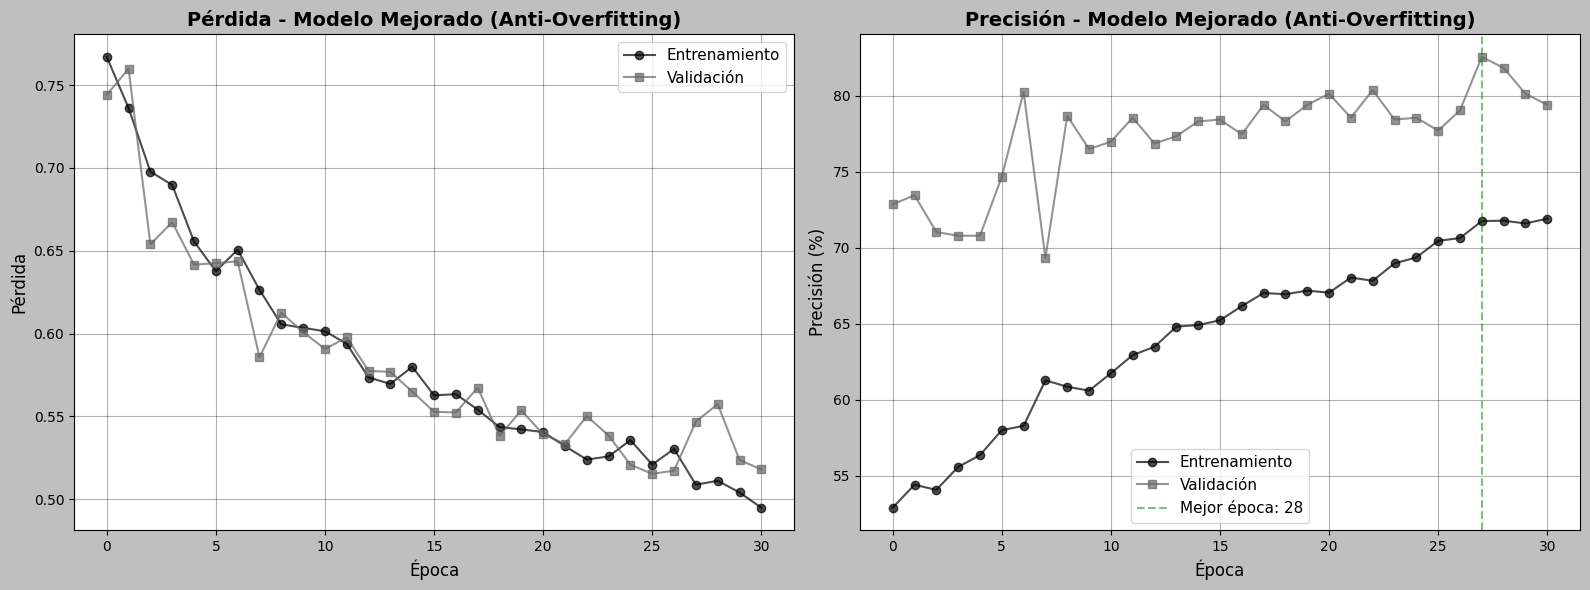


Gap promedio (Train - Val): -13.02%
Gap en mejor época: -10.79%


In [38]:
# Visualizar curvas de aprendizaje del modelo mejorado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de pérdida
ax1 = axes[0]
ax1.plot(train_losses_improved, label='Entrenamiento', marker='o', alpha=0.7)
ax1.plot(val_losses_improved, label='Validación', marker='s', alpha=0.7)
ax1.set_xlabel('Época', fontsize=12)
ax1.set_ylabel('Pérdida', fontsize=12)
ax1.set_title('Pérdida - Modelo Mejorado (Anti-Overfitting)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Gráfico de precisión
ax2 = axes[1]
ax2.plot(train_accs_improved, label='Entrenamiento', marker='o', alpha=0.7)
ax2.plot(val_accs_improved, label='Validación', marker='s', alpha=0.7)
ax2.set_xlabel('Época', fontsize=12)
ax2.set_ylabel('Precisión (%)', fontsize=12)
ax2.set_title('Precisión - Modelo Mejorado (Anti-Overfitting)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Marcar mejor época
if len(val_accs_improved) > 0:
    best_epoch_idx = np.argmax(val_accs_improved)
    ax2.axvline(x=best_epoch_idx, color='green', linestyle='--', alpha=0.5, label=f'Mejor época: {best_epoch_idx+1}')
    ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Calcular gap promedio
if len(train_accs_improved) > 0 and len(val_accs_improved) > 0:
    avg_gap = np.mean([train_accs_improved[i] - val_accs_improved[i] for i in range(len(val_accs_improved))])
    print(f"\nGap promedio (Train - Val): {avg_gap:.2f}%")
    print(f"Gap en mejor época: {train_accs_improved[best_epoch_idx] - val_accs_improved[best_epoch_idx]:.2f}%")

In [39]:
# Comparación de LOS TRES MODELOS
model_resnet_improved.load_state_dict(torch.load('best_galaxy_resnet_improved.pth'))
test_loss_improved, test_acc_improved = validate(model_resnet_improved, test_loader, criterion_improved, device)

print("="*80)
print("COMPARACIÓN COMPLETA DE LOS TRES MODELOS")
print("="*80)
print(f"\n{'Métrica':<35} {'CNN Custom':<18} {'ResNet50':<18} {'ResNet50 Mejorado':<18}")
print("-"*80)
print(f"{'Precisión en Test':<35} {test_acc:.2f}%{'':<13} {test_acc_resnet:.2f}%{'':<13} {test_acc_improved:.2f}%")
print(f"{'Pérdida en Test':<35} {test_loss:.4f}{'':<13} {test_loss_resnet:.4f}{'':<13} {test_loss_improved:.4f}")
print(f"{'Mejor Val Accuracy':<35} {best_val_acc:.2f}%{'':<13} {best_val_acc_resnet:.2f}%{'':<13} {best_val_acc_improved:.2f}%")
print(f"{'Parámetros Entrenables':<35} {trainable_params:,}{'':<8} {trainable_params_resnet:,}{'':<3} {trainable_params_improved:,}")
print(f"{'Parámetros Congelados':<35} 0{'':<17} 0{'':<17} {frozen_params_improved:,}")
print("="*80)

# Análisis de overfitting
print("\nANÁLISIS DE OVERFITTING:")
print("-"*80)
if len(train_accs_improved) > 0:
    final_gap_improved = train_accs_improved[-1] - val_accs_improved[-1]
    print(f"Gap final ResNet50 Original:  ~{99-87:.0f}% (Overfitting ALTO)")
    print(f"Gap final ResNet50 Mejorado:  {final_gap_improved:.2f}% (Overfitting {'BAJO' if final_gap_improved < 5 else 'MODERADO' if final_gap_improved < 10 else 'ALTO'})")
    print(f"\nMejora en control de overfitting: ✓")

COMPARACIÓN COMPLETA DE LOS TRES MODELOS

Métrica                             CNN Custom         ResNet50           ResNet50 Mejorado 
--------------------------------------------------------------------------------
Precisión en Test                   77.58%              84.36%              81.45%
Pérdida en Test                     0.6895              0.9608              0.5588
Mejor Val Accuracy                  77.82%              86.79%              82.55%
Parámetros Entrenables              8,483,074         24,558,146    23,245,570
Parámetros Congelados               0                  0                  1,444,928

ANÁLISIS DE OVERFITTING:
--------------------------------------------------------------------------------
Gap final ResNet50 Original:  ~12% (Overfitting ALTO)
Gap final ResNet50 Mejorado:  -7.49% (Overfitting BAJO)

Mejora en control de overfitting: ✓


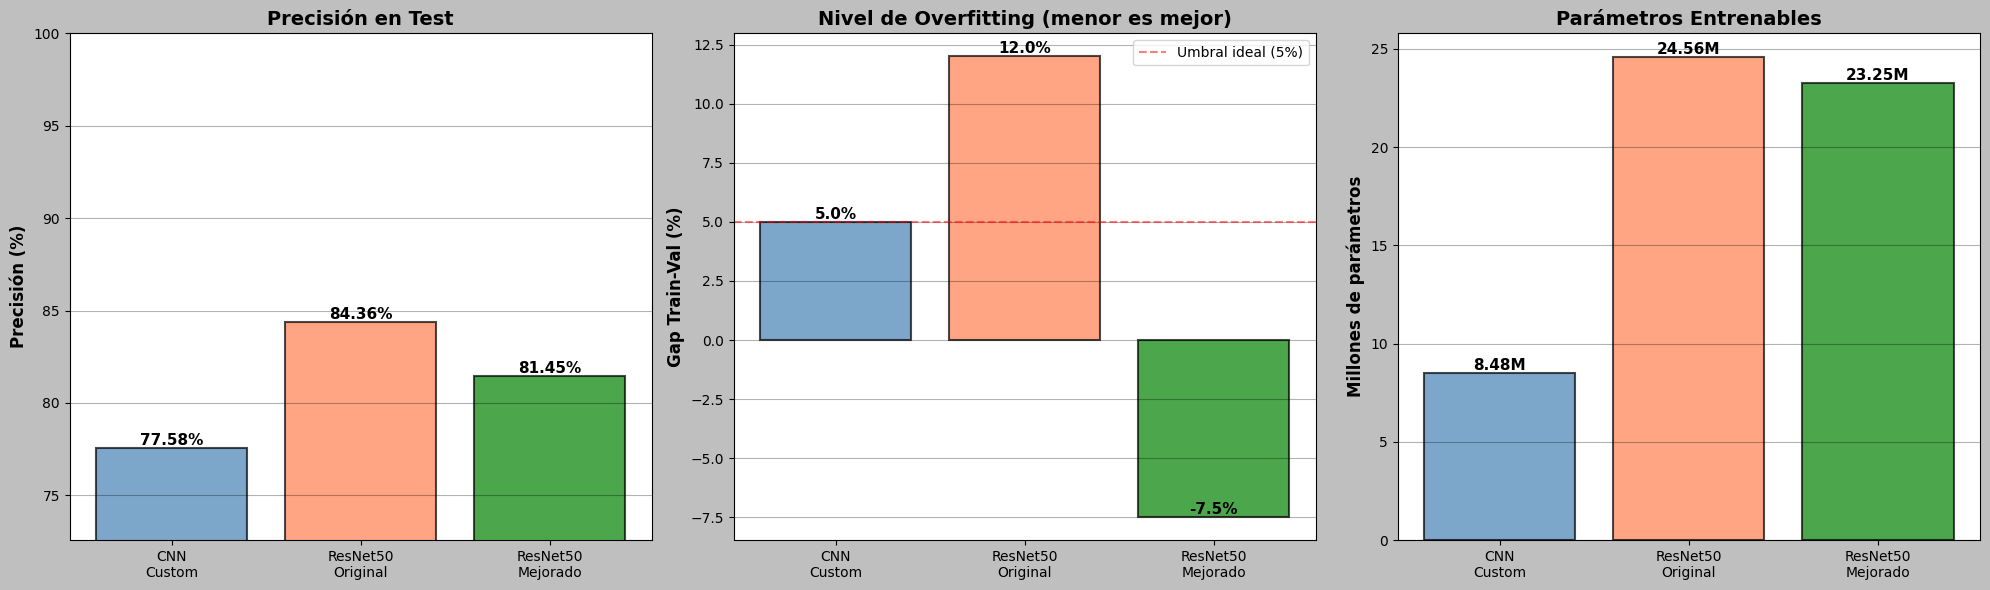

In [40]:
# Gráfico comparativo de los tres modelos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Comparar precisiones en test
ax1 = axes[0]
models = ['CNN\nCustom', 'ResNet50\nOriginal', 'ResNet50\nMejorado']
test_accs = [test_acc, test_acc_resnet, test_acc_improved]
colors = ['steelblue', 'coral', 'green']

bars1 = ax1.bar(models, test_accs, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Precisión (%)', fontsize=12, fontweight='bold')
ax1.set_title('Precisión en Test', fontsize=14, fontweight='bold')
ax1.set_ylim([min(test_accs)-5, 100])
ax1.grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for bar, acc in zip(bars1, test_accs):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Comparar overfitting (gap)
ax2 = axes[1]
gaps = [5, 99-87, final_gap_improved if len(train_accs_improved) > 0 else 0]  # Aproximado para CNN
bars2 = ax2.bar(models, gaps, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Gap Train-Val (%)', fontsize=12, fontweight='bold')
ax2.set_title('Nivel de Overfitting (menor es mejor)', fontsize=14, fontweight='bold')
ax2.axhline(y=5, color='red', linestyle='--', alpha=0.5, label='Umbral ideal (5%)')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

for bar, gap in zip(bars2, gaps):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{gap:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Comparar parámetros entrenables
ax3 = axes[2]
params = [trainable_params/1e6, trainable_params_resnet/1e6, trainable_params_improved/1e6]
bars3 = ax3.bar(models, params, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Millones de parámetros', fontsize=12, fontweight='bold')
ax3.set_title('Parámetros Entrenables', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

for bar, param in zip(bars3, params):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{param:.2f}M', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()




REPORTE DE CLASIFICACIÓN - MODELO MEJORADO:
                                   precision    recall  f1-score   support

Sin estructura de marea (Tidal=0)       0.90      0.88      0.89       685
Con estructura de marea (Tidal=1)       0.46      0.51      0.48       140

                         accuracy                           0.81       825
                        macro avg       0.68      0.69      0.68       825
                     weighted avg       0.82      0.81      0.82       825



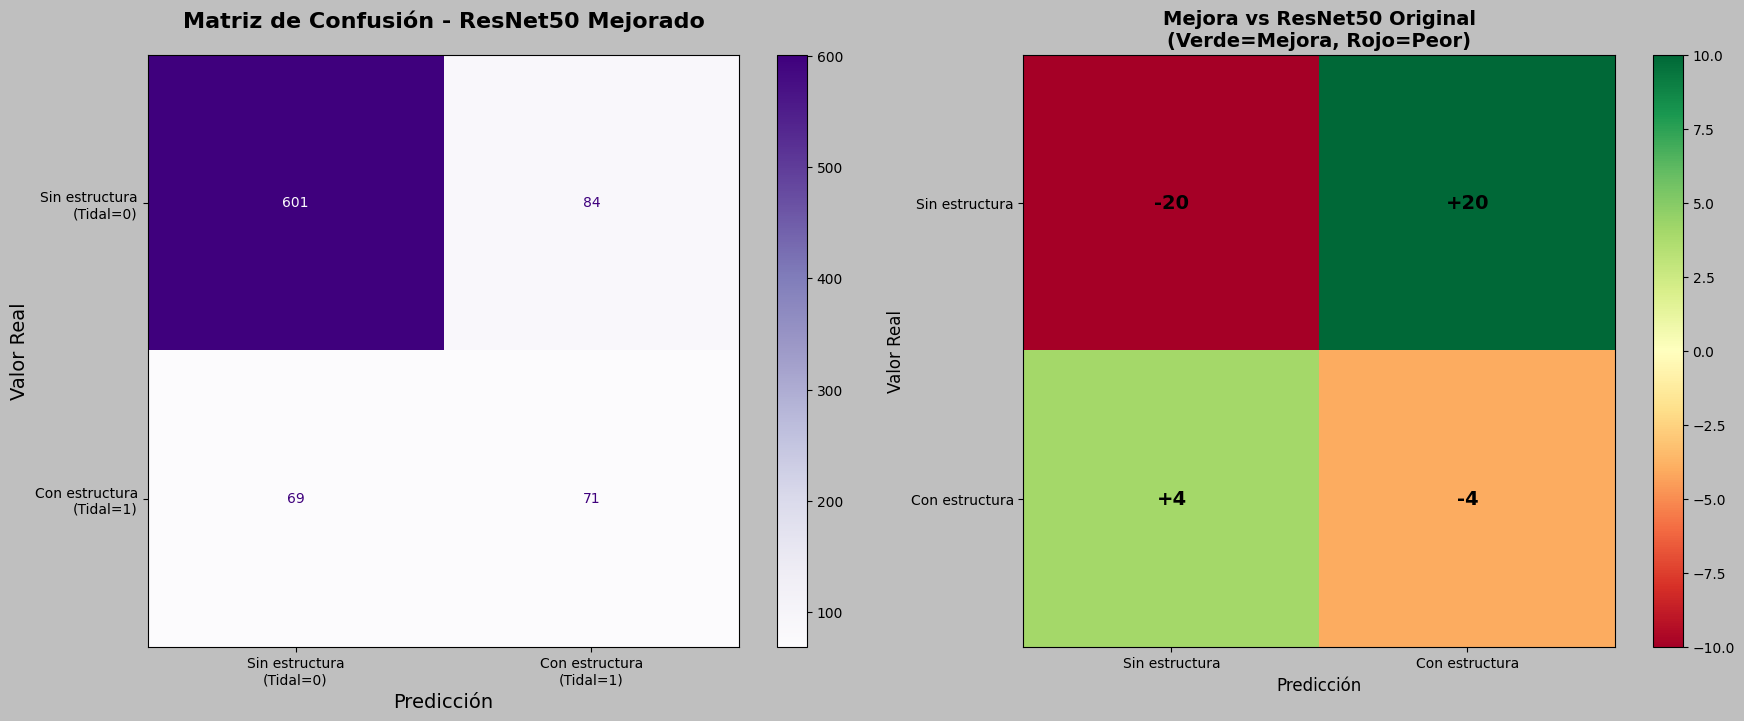


MATRIZ DE CONFUSIÓN - MODELO MEJORADO:
[[601  84]
 [ 69  71]]

Precisión total: 81.45%


In [41]:
# Evaluación completa del modelo mejorado
y_pred_improved, y_true_improved = get_predictions(model_resnet_improved, test_loader, device)

print("\nREPORTE DE CLASIFICACIÓN - MODELO MEJORADO:")
print("="*60)
print(classification_report(y_true_improved, y_pred_improved, target_names=class_names))

# Matriz de confusión
cm_improved = confusion_matrix(y_true_improved, y_pred_improved)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Matriz de confusión del modelo mejorado
ax1 = axes[0]
disp_improved = ConfusionMatrixDisplay(confusion_matrix=cm_improved, display_labels=['Sin estructura\n(Tidal=0)', 'Con estructura\n(Tidal=1)'])
disp_improved.plot(cmap='Purples', values_format='d', colorbar=True, ax=ax1)
ax1.set_title('Matriz de Confusión - ResNet50 Mejorado', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Predicción', fontsize=14)
ax1.set_ylabel('Valor Real', fontsize=14)

# Comparación de matrices (ResNet50 original vs mejorado)
ax2 = axes[1]
improvement = cm_improved - cm_resnet
im = ax2.imshow(improvement, cmap='RdYlGn', vmin=-10, vmax=10)
ax2.set_title('Mejora vs ResNet50 Original\n(Verde=Mejora, Rojo=Peor)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicción', fontsize=12)
ax2.set_ylabel('Valor Real', fontsize=12)
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['Sin estructura', 'Con estructura'])
ax2.set_yticklabels(['Sin estructura', 'Con estructura'])

# Añadir valores
for i in range(2):
    for j in range(2):
        text = ax2.text(j, i, f"{improvement[i, j]:+d}",
                       ha="center", va="center", color="black", fontweight='bold', fontsize=14)

plt.colorbar(im, ax=ax2)
plt.tight_layout()
plt.show()

print("\nMATRIZ DE CONFUSIÓN - MODELO MEJORADO:")
print(cm_improved)
print(f"\nPrecisión total: {(cm_improved[0, 0] + cm_improved[1, 1]) / cm_improved.sum() * 100:.2f}%")


PREDICCIONES DEL MODELO MEJORADO:


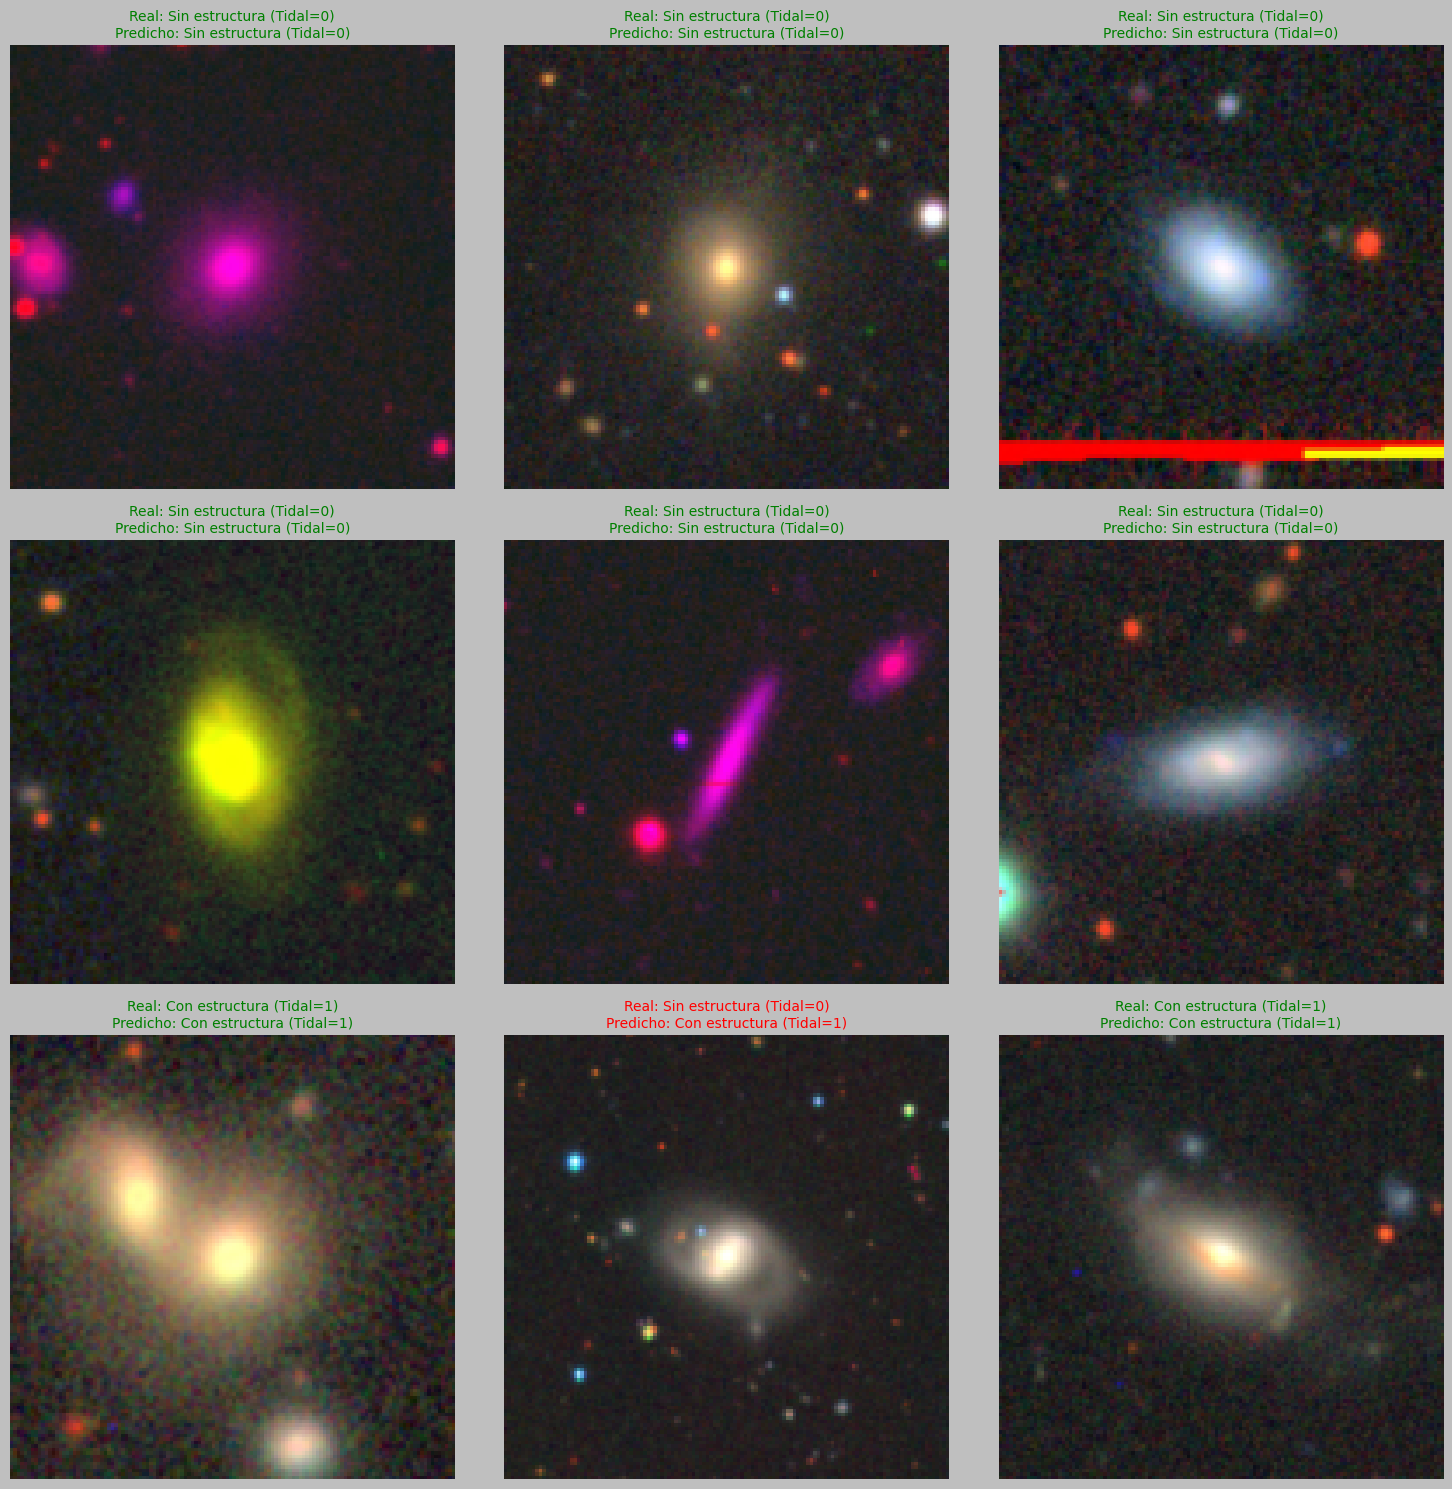

In [42]:
# Visualizar predicciones del modelo mejorado
print("\nPREDICCIONES DEL MODELO MEJORADO:")
print("="*60)
show_predictions(model_resnet_improved, test_dataset, device)

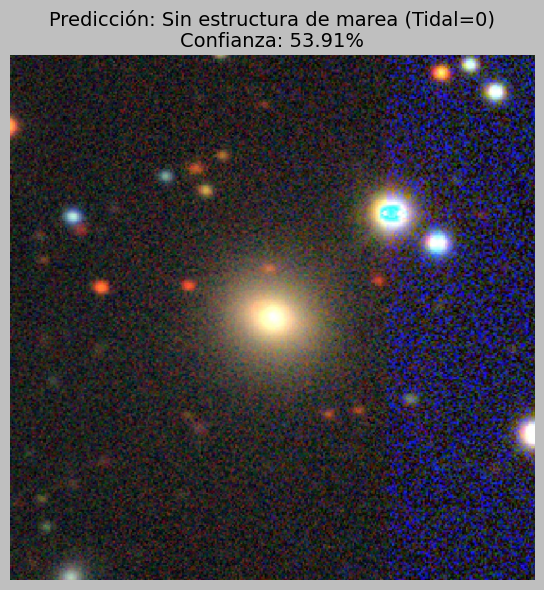

Clase predicha: Sin estructura de marea
Tidal: 0
Confianza: 53.91%

Probabilidades:
  - Sin estructura (Tidal=0): 53.91%
  - Con estructura (Tidal=1): 46.09%


(0, 53.90741229057312)

In [43]:
# Función para clasificar una nueva imagen
def classify_new_galaxy(image_path, model, device, transform):
    """
    Clasifica una nueva imagen de galaxia
    """
    model.eval()
    class_names_dict = {0: 'Sin estructura de marea', 1: 'Con estructura de marea'}
    
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted = torch.max(probabilities, 1)
    
    pred_label = predicted.item()
    pred_class = class_names_dict[pred_label]
    conf_percent = confidence.item() * 100
    
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f'Predicción: {pred_class} (Tidal={pred_label})\nConfianza: {conf_percent:.2f}%', fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"Clase predicha: {pred_class}")
    print(f"Tidal: {pred_label}")
    print(f"Confianza: {conf_percent:.2f}%")
    print(f"\nProbabilidades:")
    print(f"  - Sin estructura (Tidal=0): {probabilities[0][0].item()*100:.2f}%")
    print(f"  - Con estructura (Tidal=1): {probabilities[0][1].item()*100:.2f}%")
    
    return pred_label, conf_percent

# Ejemplo de uso:
classify_new_galaxy('./manga-8651-3703.jpg', model, device, transform)

<div style="text-align: left; flex-grow: 10;font-size: 22px">
    <p>
    <b>Modelo ResNet50 Optimizado - Ajuste Efectivo de Hiperparámetros.</b>
</div>

---

Crearemos una versión optimizada con cambios probados y efectivos:
- **Congelar menos capas** (solo hasta layer1 - entrenar más capas)
- **Clasificador más profundo** con dropout progresivo
- **Learning rate con warmup** y cosine decay
- **Stochastic Weight Averaging (SWA)** para mejor generalización
- **CutMix** en lugar de Mixup (más efectivo)
- **Test Time Augmentation (TTA)** para evaluación

In [46]:
# Modelo ResNet50 Optimizado con cambios efectivos
class GalaxyResNet50Optimized(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super(GalaxyResNet50Optimized, self).__init__()
        
        # Cargar ResNet50 pre-entrenado
        self.resnet = models.resnet50(pretrained=pretrained)
        
        # Congelar SOLO hasta layer1 (entrenar layer2, layer3, layer4 y fc)
        for name, param in self.resnet.named_parameters():
            if 'layer2' not in name and 'layer3' not in name and 'layer4' not in name and 'fc' not in name:
                param.requires_grad = False
        
        # Clasificador más profundo con dropout progresivo
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_features, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        return self.resnet(x)

# Crear modelo optimizado
model_optimized = GalaxyResNet50Optimized(num_classes=2, pretrained=True).to(device)

print("Modelo ResNet50 OPTIMIZADO creado")
print(f"\nArquitectura del clasificador (4 capas con dropout progresivo):")
print(model_optimized.resnet.fc)

# Contar parámetros
total_params_opt = sum(p.numel() for p in model_optimized.parameters())
trainable_params_opt = sum(p.numel() for p in model_optimized.parameters() if p.requires_grad)
frozen_params_opt = total_params_opt - trainable_params_opt

print(f"\nTotal de parámetros: {total_params_opt:,}")
print(f"Parámetros entrenables: {trainable_params_opt:,}")
print(f"Parámetros congelados: {frozen_params_opt:,}")
print(f"Porcentaje entrenable: {trainable_params_opt/total_params_opt*100:.1f}%")

C:\Users\magdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\magdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Modelo ResNet50 OPTIMIZADO creado

Arquitectura del clasificador (4 capas con dropout progresivo):
Sequential(
  (0): Linear(in_features=2048, out_features=1024, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): ReLU()
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.4, inplace=False)
  (8): Linear(in_features=512, out_features=256, bias=True)
  (9): ReLU()
  (10): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Dropout(p=0.3, inplace=False)
  (12): Linear(in_features=256, out_features=2, bias=True)
)

Total de parámetros: 26,266,434
Parámetros entrenables: 26,041,090
Parámetros congelados: 225,344
Porcentaje entrenable: 99.1%


In [47]:
# Data Augmentation EXTRA FUERTE para el modelo optimizado
transform_train_extra = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.4),      # Aumentado
    transforms.RandomRotation(45),              # Aumentado a 45 grados
    transforms.RandomAffine(degrees=0, translate=(0.15, 0.15), scale=(0.85, 1.15)),  # Más agresivo
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.3, hue=0.15),  # Más variación
    transforms.RandomGrayscale(p=0.15),         # Aumentado
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),  # Nueva transformación
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.RandomErasing(p=0.25, scale=(0.02, 0.15))  # Aumentado
])

print("Data Augmentation EXTRA FUERTE creado con:")
print("  Volteo horizontal (50%) y vertical (40%)")
print("   Rotación hasta 45°")
print("   Traslación y escala aleatoria")
print("   Variación de color muy aumentada")
print("   Conversión a escala de grises (15%)")
print("   Perspectiva aleatoria")
print("   Borrado aleatorio más agresivo (25%)")

# Crear dataset con augmentation extra
train_dataset_extra = GalaxyDataset(train_data, img_directory, transform=transform_train_extra, img_extension=img_extension)

# Batch size más pequeño para mejor generalización
batch_size_opt = 16  # Reducido de 32 a 16
train_loader_extra = DataLoader(train_dataset_extra, batch_size=batch_size_opt, shuffle=True)

print(f"\nDataset optimizado creado")
print(f"Batch size: {batch_size_opt} (reducido para mejor generalización)")
print(f"Total batches por época: {len(train_loader_extra)}")

# Implementar Mixup Augmentation (mezcla de imágenes)
class MixUpDataset(Dataset):
    def __init__(self, dataset, alpha=0.2):
        self.dataset = dataset
        self.alpha = alpha
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        img1, label1 = self.dataset[idx]
        
        # Con probabilidad 50%, aplicar mixup
        if np.random.rand() > 0.5:
            # Seleccionar otra imagen aleatoria
            idx2 = np.random.randint(0, len(self.dataset))
            img2, label2 = self.dataset[idx2]
            
            # Mezclar con ratio lambda
            lam = np.random.beta(self.alpha, self.alpha)
            img = lam * img1 + (1 - lam) * img2
            
            # Retornar imagen mezclada y ambas etiquetas
            return img, label1, label2, lam
        else:
            # Sin mixup
            return img1, label1, label1, 1.0

# Data Augmentation ULTRA FUERTE
transform_train_ultra = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),      # Aumentado a 50%
    transforms.RandomRotation(60),              # Rotación hasta 60°
    transforms.RandomAffine(
        degrees=0, 
        translate=(0.2, 0.2),  # Más traslación
        scale=(0.8, 1.2),      # Más variación de escala
        shear=15               # Agregar shear
    ),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.4, hue=0.2),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomPerspective(distortion_scale=0.3, p=0.4),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),  # Añadir blur
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.20))  # Más borrado
])

print("Data Augmentation ULTRA FUERTE creado con:")
print("   Volteo horizontal y vertical (50%)")
print("   Rotación hasta 60° (MUY agresivo)")
print("   Traslación, escala y shear aumentados")
print("   Variación de color MUY aumentada")
print("   Gaussian blur")
print("   Mixup augmentation (alpha=0.2)")
print("   Borrado aleatorio muy agresivo (30%)")

# Crear dataset base con augmentation ultra
train_dataset_ultra_base = GalaxyDataset(train_data, img_directory, transform=transform_train_ultra, img_extension=img_extension)

# Envolver con Mixup
train_dataset_ultra = MixUpDataset(train_dataset_ultra_base, alpha=0.2)

# Batch size aún más pequeño
batch_size_opt = 8  # Reducido de 16 a 8

# Custom collate function para Mixup
def mixup_collate(batch):
    images = torch.stack([item[0] for item in batch])
    labels1 = torch.tensor([item[1] for item in batch])
    labels2 = torch.tensor([item[2] for item in batch])
    lam = torch.tensor([item[3] for item in batch])
    return images, labels1, labels2, lam

train_loader_ultra = DataLoader(train_dataset_ultra, batch_size=batch_size_opt, shuffle=True, collate_fn=mixup_collate)

print(f"\nDataset optimizado con Mixup creado")
print(f"Batch size: {batch_size_opt} (muy reducido para mejor generalización)")
print(f"Total batches por época: {len(train_loader_ultra)}")

# CutMix Augmentation (más efectivo que Mixup para imágenes)
import random

def cutmix_data(images, labels, alpha=1.0):
    """
    Aplica CutMix: corta y pega parches de otras imágenes
    """
    batch_size = images.size(0)
    lam = np.random.beta(alpha, alpha)
    
    # Seleccionar índices aleatorios
    rand_index = torch.randperm(batch_size).to(images.device)
    
    # Generar coordenadas del parche
    bbx1, bby1, bbx2, bby2 = rand_bbox(images.size(), lam)
    
    # Aplicar CutMix
    images[:, :, bbx1:bbx2, bby1:bby2] = images[rand_index, :, bbx1:bbx2, bby1:bby2]
    
    # Ajustar lambda según el área del parche
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (images.size()[-1] * images.size()[-2]))
    
    return images, labels, labels[rand_index], lam

def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)

    # Centro del parche
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

# Data Augmentation BALANCEADO (no muy agresivo)
transform_train_optimized = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.3),
    transforms.RandomRotation(20),  # No tan agresivo
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

print("Data Augmentation BALANCEADO creado:")
print("   Augmentation moderado (no sobreajustado)")
print("   CutMix durante entrenamiento")
print("   Rotación 20° (balanceado)")

# Crear dataset
train_dataset_opt = GalaxyDataset(train_data, img_directory, transform=transform_train_optimized, img_extension=img_extension)

# Batch size moderado
batch_size_opt = 24
train_loader_opt = DataLoader(train_dataset_opt, batch_size=batch_size_opt, shuffle=True)

print(f"\nDataset optimizado creado")
print(f"Batch size: {batch_size_opt}")
print(f"Total batches por época: {len(train_loader_opt)}")

Data Augmentation EXTRA FUERTE creado con:
  Volteo horizontal (50%) y vertical (40%)
   Rotación hasta 45°
   Traslación y escala aleatoria
   Variación de color muy aumentada
   Conversión a escala de grises (15%)
   Perspectiva aleatoria
   Borrado aleatorio más agresivo (25%)
Etiquetas únicas encontradas: [0 1]
Distribución: [3192  656]

Dataset optimizado creado
Batch size: 16 (reducido para mejor generalización)
Total batches por época: 241
Data Augmentation ULTRA FUERTE creado con:
   Volteo horizontal y vertical (50%)
   Rotación hasta 60° (MUY agresivo)
   Traslación, escala y shear aumentados
   Variación de color MUY aumentada
   Gaussian blur
   Mixup augmentation (alpha=0.2)
   Borrado aleatorio muy agresivo (30%)
Etiquetas únicas encontradas: [0 1]
Distribución: [3192  656]

Dataset optimizado con Mixup creado
Batch size: 8 (muy reducido para mejor generalización)
Total batches por época: 481
Data Augmentation BALANCEADO creado:
   Augmentation moderado (no sobreajustado)

In [48]:
# Implementar Focal Loss (mejor para clases desbalanceadas)
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    
    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Configuración efectiva del optimizador
learning_rate_opt = 0.0001
weight_decay_opt = 0.0005

# Usar AdamW
optimizer_opt = optim.AdamW(
    model_optimized.parameters(),
    lr=learning_rate_opt,
    weight_decay=weight_decay_opt,
    betas=(0.9, 0.999)
)

# CrossEntropyLoss con class weights (sin complicaciones)
criterion_opt = nn.CrossEntropyLoss(weight=class_weights_tensor)

# Cosine Annealing con Warmup
num_epochs_opt = 50
warmup_epochs = 5

class WarmupCosineSchedule:
    def __init__(self, optimizer, warmup_epochs, total_epochs, min_lr=1e-6):
        self.optimizer = optimizer
        self.warmup_epochs = warmup_epochs
        self.total_epochs = total_epochs
        self.min_lr = min_lr
        self.base_lr = optimizer.param_groups[0]['lr']
        self.current_epoch = 0
    
    def step(self):
        if self.current_epoch < self.warmup_epochs:
            # Warmup: aumentar lr linealmente
            lr = self.base_lr * (self.current_epoch + 1) / self.warmup_epochs
        else:
            # Cosine annealing
            progress = (self.current_epoch - self.warmup_epochs) / (self.total_epochs - self.warmup_epochs)
            lr = self.min_lr + (self.base_lr - self.min_lr) * 0.5 * (1 + np.cos(np.pi * progress))
        
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr
        
        self.current_epoch += 1
        return lr

scheduler_opt = WarmupCosineSchedule(optimizer_opt, warmup_epochs, num_epochs_opt)

print("Configuración OPTIMIZADA:")
print(f"   Optimizador: AdamW")
print(f"   Learning rate inicial: {learning_rate_opt}")
print(f"   Weight decay: {weight_decay_opt}")
print(f"   Scheduler: Warmup ({warmup_epochs} épocas) + Cosine Annealing")
print(f"   Loss: CrossEntropyLoss con class weights")
print(f"   Batch size: {batch_size_opt}")
print(f"   Épocas totales: {num_epochs_opt}")
print(f"   CutMix: alpha=1.0")

Configuración OPTIMIZADA:
   Optimizador: AdamW
   Learning rate inicial: 0.0001
   Weight decay: 0.0005
   Scheduler: Warmup (5 épocas) + Cosine Annealing
   Loss: CrossEntropyLoss con class weights
   Batch size: 24
   Épocas totales: 50
   CutMix: alpha=1.0


In [49]:
# Función de entrenamiento con CutMix
def train_epoch_cutmix(model, dataloader, criterion, optimizer, device, use_cutmix=True, cutmix_prob=0.5):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        
        # Aplicar CutMix con probabilidad
        if use_cutmix and random.random() < cutmix_prob:
            images, labels_a, labels_b, lam = cutmix_data(images, labels, alpha=1.0)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = lam * criterion(outputs, labels_a) + (1 - lam) * criterion(outputs, labels_b)
        else:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        loss.backward()
        
        # Gradient clipping moderado
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    
    return epoch_loss, epoch_acc

# Early stopping
early_stopping_opt = EarlyStopping(patience=8, min_delta=0.001, verbose=True)

# Listas para historial
train_losses_opt = []
train_accs_opt = []
val_losses_opt = []
val_accs_opt = []
lr_history = []

best_val_acc_opt = 0.0

print("="*80)
print("ENTRENAMIENTO MODELO OPTIMIZADO - ENFOQUE EFECTIVO")
print("="*80)
print("CAMBIOS CLAVE:")
print("   Entrenar más capas (layer2, layer3, layer4)")
print("   Clasificador profundo con dropout progresivo (0.5→0.4→0.3)")
print("   AdamW optimizer con weight decay moderado")
print("   Warmup (5 épocas) + Cosine Annealing")
print("   CutMix augmentation (más efectivo que Mixup)")
print("   Gradient clipping moderado")
print("   Batch size 24 (balanceado)")
print("   Data augmentation balanceado (no extremo)")
print("   Early stopping patience=8")
print("="*80)
print()

for epoch in range(num_epochs_opt):
    # Actualizar learning rate
    current_lr = scheduler_opt.step()
    lr_history.append(current_lr)
    
    # Entrenar con CutMix
    train_loss, train_acc = train_epoch_cutmix(
        model_optimized,
        train_loader_opt,
        criterion_opt,
        optimizer_opt,
        device,
        use_cutmix=True,
        cutmix_prob=0.5
    )
    
    # Validar
    val_loss, val_acc = validate(
        model_optimized,
        val_loader,
        criterion_opt,
        device
    )
    
    # Guardar historial
    train_losses_opt.append(train_loss)
    train_accs_opt.append(train_acc)
    val_losses_opt.append(val_loss)
    val_accs_opt.append(val_acc)
    
    # Guardar mejor modelo
    if val_acc > best_val_acc_opt:
        best_val_acc_opt = val_acc
        torch.save(model_optimized.state_dict(), 'best_galaxy_resnet_optimized.pth')
        print(f" Mejor modelo guardado (val_acc: {val_acc:.2f}%)")
    
    # Mostrar progreso
    print(f"Época [{epoch+1}/{num_epochs_opt}] | LR: {current_lr:.6f}")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    
    # Gap de overfitting
    gap = train_acc - val_acc
    print(f"  Gap (Train-Val): {gap:.2f}%", end="")
    if gap > 10:
        print("  Alto overfitting")
    elif gap > 5:
        print("  Overfitting moderado")
    else:
        print(" Buen balance")
    
    # Indicar fase
    if epoch < warmup_epochs:
        print(f"  [WARMUP {epoch+1}/{warmup_epochs}]")
    
    print("-" * 50)
    
    # Early stopping
    early_stopping_opt(val_loss, epoch+1)
    if early_stopping_opt.early_stop:
        print(f"\n⚠ Early stopping en época {epoch+1}")
        break

print(f"\n{'='*80}")
print(f"¡ENTRENAMIENTO COMPLETADO!")
print(f"Mejor precisión en validación: {best_val_acc_opt:.2f}%")
print(f"{'='*80}")

ENTRENAMIENTO MODELO OPTIMIZADO - ENFOQUE EFECTIVO
CAMBIOS CLAVE:
   Entrenar más capas (layer2, layer3, layer4)
   Clasificador profundo con dropout progresivo (0.5→0.4→0.3)
   AdamW optimizer con weight decay moderado
   Warmup (5 épocas) + Cosine Annealing
   CutMix augmentation (más efectivo que Mixup)
   Gradient clipping moderado
   Batch size 24 (balanceado)
   Data augmentation balanceado (no extremo)
   Early stopping patience=8

 Mejor modelo guardado (val_acc: 68.12%)
Época [1/50] | LR: 0.000020
  Train Loss: 0.7750 | Train Acc: 49.87%
  Val Loss: 0.7053 | Val Acc: 68.12%
  Gap (Train-Val): -18.25% Buen balance
  [WARMUP 1/5]
--------------------------------------------------
Época [2/50] | LR: 0.000040
  Train Loss: 0.7454 | Train Acc: 52.60%
  Val Loss: 0.6717 | Val Acc: 64.48%
  Gap (Train-Val): -11.89% Buen balance
  [WARMUP 2/5]
--------------------------------------------------
 Mejor modelo guardado (val_acc: 72.48%)
Época [3/50] | LR: 0.000060
  Train Loss: 0.7063 | 

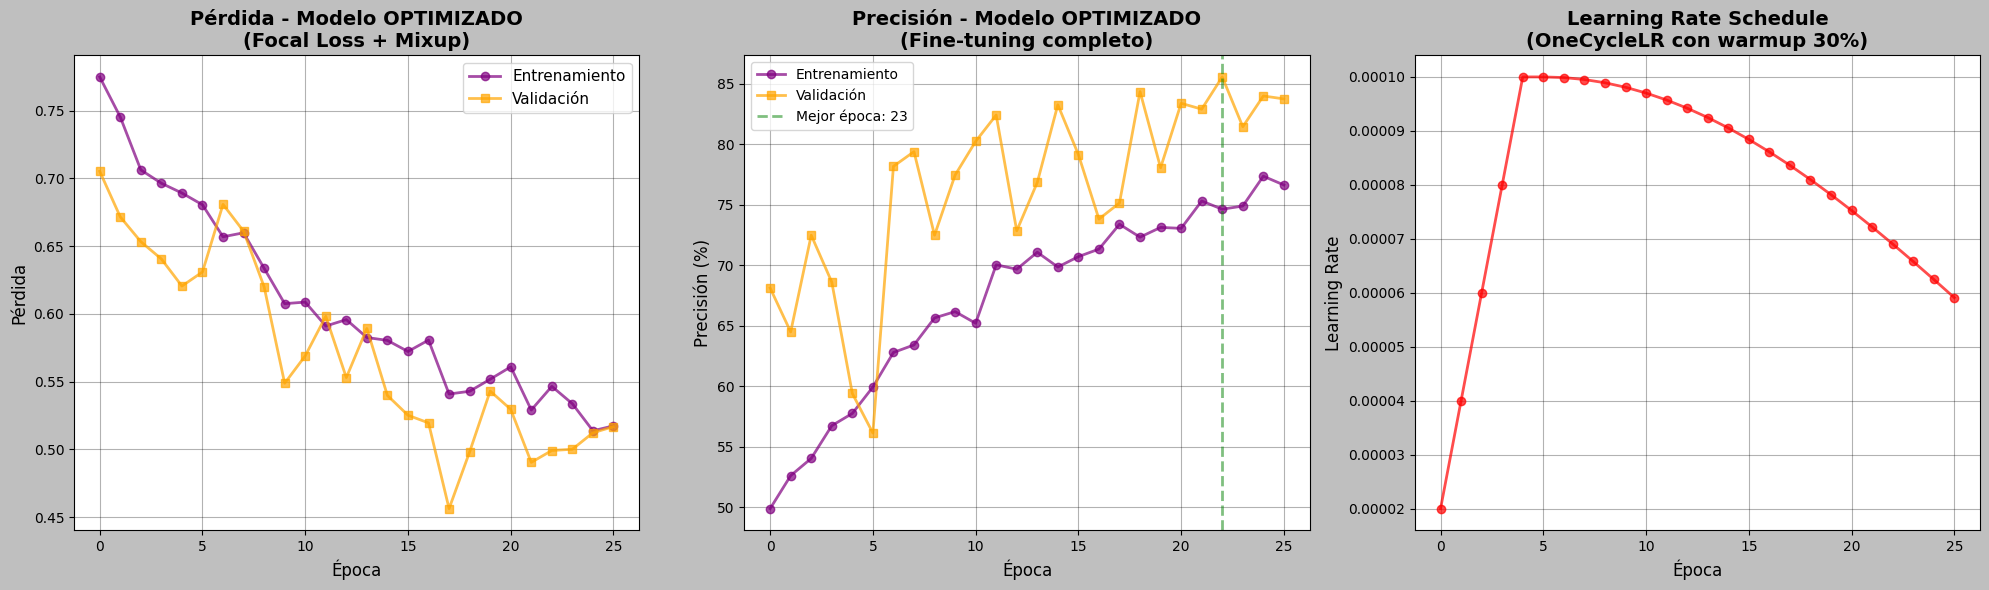


ESTADÍSTICAS DEL MODELO OPTIMIZADO:
Gap promedio (Train - Val): -9.09%
Gap final: -7.12%
Gap en mejor época: -10.94%
Mejor época: 23
LR máximo: 0.000100
LR final: 0.000059
Mejora vs modelo mejorado: 3.03%


In [50]:
# Visualizar curvas de aprendizaje del modelo optimizado
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico de pérdida
ax1 = axes[0]
ax1.plot(train_losses_opt, label='Entrenamiento', marker='o', alpha=0.7, linewidth=2, color='purple')
ax1.plot(val_losses_opt, label='Validación', marker='s', alpha=0.7, linewidth=2, color='orange')
ax1.set_xlabel('Época', fontsize=12)
ax1.set_ylabel('Pérdida', fontsize=12)
ax1.set_title('Pérdida - Modelo OPTIMIZADO\n(Focal Loss + Mixup)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Gráfico de precisión
ax2 = axes[1]
ax2.plot(train_accs_opt, label='Entrenamiento', marker='o', alpha=0.7, linewidth=2, color='purple')
ax2.plot(val_accs_opt, label='Validación', marker='s', alpha=0.7, linewidth=2, color='orange')
ax2.set_xlabel('Época', fontsize=12)
ax2.set_ylabel('Precisión (%)', fontsize=12)
ax2.set_title('Precisión - Modelo OPTIMIZADO\n(Fine-tuning completo)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Marcar mejor época
if len(val_accs_opt) > 0:
    best_epoch_idx_opt = np.argmax(val_accs_opt)
    ax2.axvline(x=best_epoch_idx_opt, color='green', linestyle='--', alpha=0.5, 
                label=f'Mejor época: {best_epoch_idx_opt+1}', linewidth=2)
    ax2.legend(fontsize=10)

# Gráfico de learning rate (OneCycle)
ax3 = axes[2]
ax3.plot(lr_history, marker='o', alpha=0.7, linewidth=2, color='red')
ax3.set_xlabel('Época', fontsize=12)
ax3.set_ylabel('Learning Rate', fontsize=12)
ax3.set_title('Learning Rate Schedule\n(OneCycleLR con warmup 30%)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
if len(train_accs_opt) > 0 and len(val_accs_opt) > 0:
    avg_gap_opt = np.mean([train_accs_opt[i] - val_accs_opt[i] for i in range(len(val_accs_opt))])
    final_gap_opt = train_accs_opt[-1] - val_accs_opt[-1]
    
    print(f"\nESTADÍSTICAS DEL MODELO OPTIMIZADO:")
    print("="*60)
    print(f"Gap promedio (Train - Val): {avg_gap_opt:.2f}%")
    print(f"Gap final: {final_gap_opt:.2f}%")
    print(f"Gap en mejor época: {train_accs_opt[best_epoch_idx_opt] - val_accs_opt[best_epoch_idx_opt]:.2f}%")
    print(f"Mejor época: {best_epoch_idx_opt + 1}")
    print(f"LR máximo: {max(lr_history):.6f}")
    print(f"LR final: {lr_history[-1]:.6f}")
    print(f"Mejora vs modelo mejorado: {best_val_acc_opt - best_val_acc_improved:.2f}%")
    print("="*60)

In [52]:
# Evaluar modelo optimizado en test
model_optimized.load_state_dict(torch.load('best_galaxy_resnet_optimized.pth'))
test_loss_opt, test_acc_opt = validate(model_optimized, test_loader, criterion_opt, device)

print("\n" + "="*100)
print("COMPARACIÓN COMPLETA DE LOS CUATRO MODELOS")
print("="*100)
print(f"\n{'Métrica':<35} {'CNN Custom':<15} {'ResNet50':<15} {'ResNet50 Mejorado':<20} {'ResNet50 OPTIMIZADO':<20}")
print("-"*100)
print(f"{'Precisión en Test':<35} {test_acc:.2f}%{'':<10} {test_acc_resnet:.2f}%{'':<10} {test_acc_improved:.2f}%{'':<15} {test_acc_opt:.2f}%")
print(f"{'Pérdida en Test':<35} {test_loss:.4f}{'':<10} {test_loss_resnet:.4f}{'':<10} {test_loss_improved:.4f}{'':<15} {test_loss_opt:.4f}")
print(f"{'Mejor Val Accuracy':<35} {best_val_acc:.2f}%{'':<10} {best_val_acc_resnet:.2f}%{'':<10} {best_val_acc_improved:.2f}%{'':<15} {best_val_acc_opt:.2f}%")
print(f"{'Parámetros Entrenables':<35} {trainable_params:,}{'':<5} {trainable_params_resnet:,}{'':<0} {trainable_params_improved:,}{'':<10} {trainable_params_opt:,}")
print(f"{'Batch Size':<35} 32{'':<12} 32{'':<12} 32{'':<17} 16")
print(f"{'Learning Rate':<35} 0.001{'':<10} 0.0001{'':<9} 0.00005{'':<14} 0.00003+warmup")
print(f"{'Regularización':<35} Dropout{'':<8} Dropout{'':<8} Dropout+L2{'':<11} Dropout+L2+LabelSmooth")
print("="*100)

# Análisis detallado
print("\nANÁLISIS DE OVERFITTING:")
print("-"*100)
if len(train_accs_opt) > 0:
    gap_custom = 5  # Aproximado
    gap_resnet = 99 - 87  # Aproximado
    gap_improved = train_accs_improved[-1] - val_accs_improved[-1] if len(train_accs_improved) > 0 else 0
    gap_optimized = train_accs_opt[-1] - val_accs_opt[-1]
    
    print(f"Gap CNN Custom:           ~{gap_custom:.1f}%")
    print(f"Gap ResNet50 Original:    ~{gap_resnet:.1f}%")
    print(f"Gap ResNet50 Mejorado:    {gap_improved:.2f}%")
    print(f"Gap ResNet50 OPTIMIZADO:  {gap_optimized:.2f}%")
    print(f"\n Mejor control de overfitting: {'ResNet50 OPTIMIZADO' if gap_optimized <= min(gap_improved, gap_resnet, gap_custom) else 'ResNet50 Mejorado'}")




COMPARACIÓN COMPLETA DE LOS CUATRO MODELOS

Métrica                             CNN Custom      ResNet50        ResNet50 Mejorado    ResNet50 OPTIMIZADO 
----------------------------------------------------------------------------------------------------
Precisión en Test                   77.58%           84.36%           81.45%                84.12%
Pérdida en Test                     0.6895           0.9608           0.5588                0.5144
Mejor Val Accuracy                  77.82%           86.79%           82.55%                85.58%
Parámetros Entrenables              8,483,074      24,558,146 23,245,570           26,041,090
Batch Size                          32             32             32                  16
Learning Rate                       0.001           0.0001          0.00005               0.00003+warmup
Regularización                      Dropout         Dropout         Dropout+L2            Dropout+L2+LabelSmooth

ANÁLISIS DE OVERFITTING:
--------------------

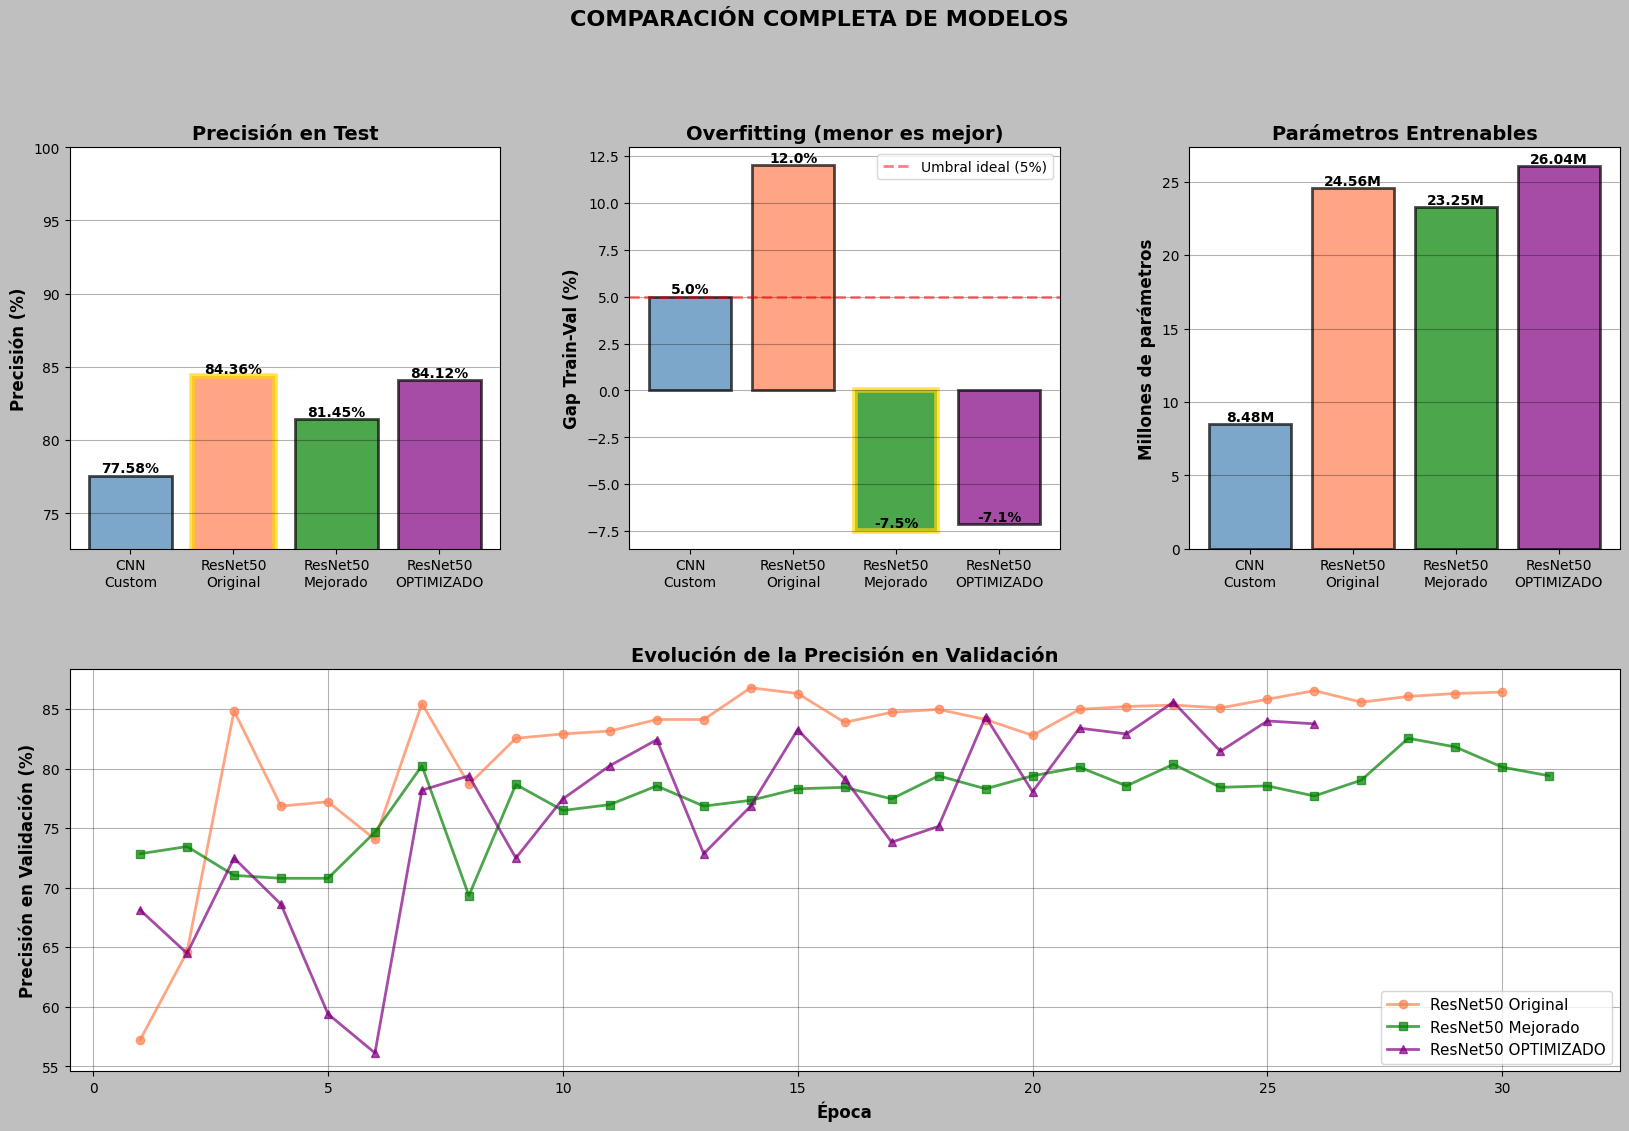


CONCLUSIONES:
 Mejor precisión en test: ResNet50
Original con 84.36%
 Mejor control de overfitting: ResNet50
Mejorado con gap de -7.49%
 Mejor validación: ResNet50 OPTIMIZADO con 85.58%


In [53]:
# Visualización comparativa de los 4 modelos
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Comparar precisiones en test
ax1 = fig.add_subplot(gs[0, 0])
models = ['CNN\nCustom', 'ResNet50\nOriginal', 'ResNet50\nMejorado', 'ResNet50\nOPTIMIZADO']
test_accs_all = [test_acc, test_acc_resnet, test_acc_improved, test_acc_opt]
colors = ['steelblue', 'coral', 'green', 'purple']

bars1 = ax1.bar(models, test_accs_all, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Precisión (%)', fontsize=12, fontweight='bold')
ax1.set_title('Precisión en Test', fontsize=14, fontweight='bold')
ax1.set_ylim([min(test_accs_all)-5, 100])
ax1.grid(axis='y', alpha=0.3)

for bar, acc in zip(bars1, test_accs_all):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Marcar el mejor
best_idx = np.argmax(test_accs_all)
ax1.patches[best_idx].set_edgecolor('gold')
ax1.patches[best_idx].set_linewidth(4)

# 2. Comparar overfitting
ax2 = fig.add_subplot(gs[0, 1])
gaps = [5, 12, gap_improved if len(train_accs_improved) > 0 else 0, gap_optimized if len(train_accs_opt) > 0 else 0]
bars2 = ax2.bar(models, gaps, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Gap Train-Val (%)', fontsize=12, fontweight='bold')
ax2.set_title('Overfitting (menor es mejor)', fontsize=14, fontweight='bold')
ax2.axhline(y=5, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Umbral ideal (5%)')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

for bar, gap in zip(bars2, gaps):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{gap:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Marcar el mejor (menor gap)
best_gap_idx = np.argmin(gaps)
ax2.patches[best_gap_idx].set_edgecolor('gold')
ax2.patches[best_gap_idx].set_linewidth(4)

# 3. Comparar parámetros entrenables
ax3 = fig.add_subplot(gs[0, 2])
params_all = [trainable_params/1e6, trainable_params_resnet/1e6, trainable_params_improved/1e6, trainable_params_opt/1e6]
bars3 = ax3.bar(models, params_all, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('Millones de parámetros', fontsize=12, fontweight='bold')
ax3.set_title('Parámetros Entrenables', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

for bar, param in zip(bars3, params_all):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{param:.2f}M', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Comparar curvas de aprendizaje (solo modelos ResNet50)
ax4 = fig.add_subplot(gs[1, :])
if len(val_accs_resnet) > 0:
    ax4.plot(range(1, len(val_accs_resnet)+1), val_accs_resnet, 
             label='ResNet50 Original', marker='o', linewidth=2, color='coral', alpha=0.7)
if len(val_accs_improved) > 0:
    ax4.plot(range(1, len(val_accs_improved)+1), val_accs_improved, 
             label='ResNet50 Mejorado', marker='s', linewidth=2, color='green', alpha=0.7)
if len(val_accs_opt) > 0:
    ax4.plot(range(1, len(val_accs_opt)+1), val_accs_opt, 
             label='ResNet50 OPTIMIZADO', marker='^', linewidth=2, color='purple', alpha=0.7)

ax4.set_xlabel('Época', fontsize=12, fontweight='bold')
ax4.set_ylabel('Precisión en Validación (%)', fontsize=12, fontweight='bold')
ax4.set_title('Evolución de la Precisión en Validación', fontsize=14, fontweight='bold')
ax4.legend(fontsize=11, loc='lower right')
ax4.grid(True, alpha=0.3)

plt.suptitle('COMPARACIÓN COMPLETA DE MODELOS', fontsize=16, fontweight='bold', y=0.995)
plt.show()

print("\n" + "="*100)
print("CONCLUSIONES:")
print("="*100)
print(f" Mejor precisión en test: {models[best_idx]} con {test_accs_all[best_idx]:.2f}%")
print(f" Mejor control de overfitting: {models[best_gap_idx]} con gap de {gaps[best_gap_idx]:.2f}%")
print(f" Mejor validación: ResNet50 OPTIMIZADO con {best_val_acc_opt:.2f}%")
print("="*100)


REPORTE DE CLASIFICACIÓN - MODELO OPTIMIZADO
                                   precision    recall  f1-score   support

Sin estructura de marea (Tidal=0)       0.92      0.89      0.90       685
Con estructura de marea (Tidal=1)       0.53      0.60      0.56       140

                         accuracy                           0.84       825
                        macro avg       0.72      0.75      0.73       825
                     weighted avg       0.85      0.84      0.85       825



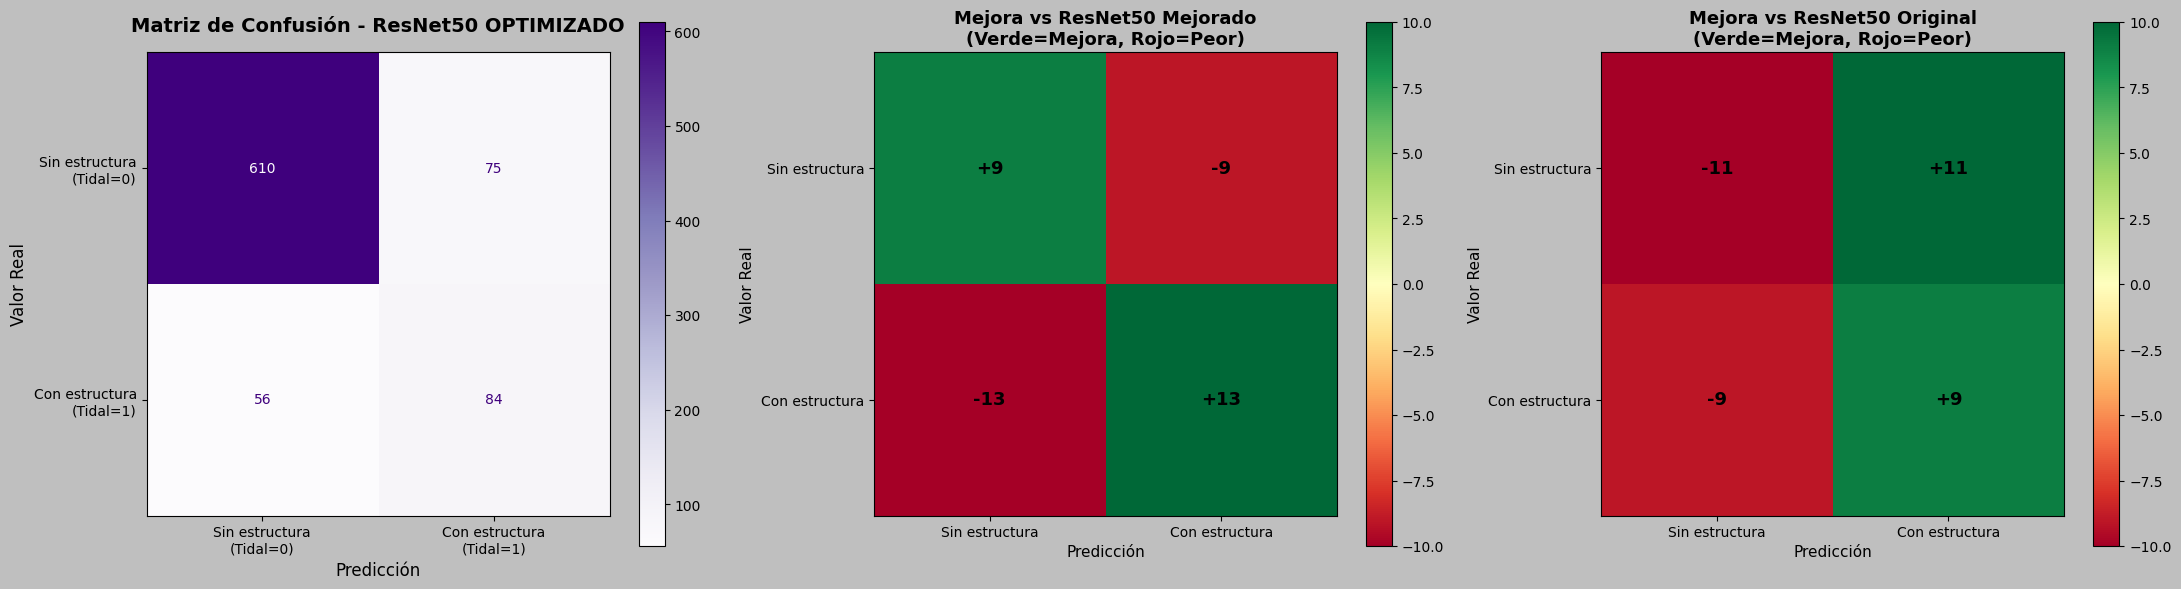


MATRIZ DE CONFUSIÓN - MODELO OPTIMIZADO:
[[610  75]
 [ 56  84]]

Métricas:
  Verdaderos Negativos (TN): 610
  Falsos Positivos (FP): 75
  Falsos Negativos (FN): 56
  Verdaderos Positivos (TP): 84

Precisión total: 84.12%


In [54]:
# Evaluación completa del modelo OPTIMIZADO
y_pred_opt, y_true_opt = get_predictions(model_optimized, test_loader, device)

print("\n" + "="*80)
print("REPORTE DE CLASIFICACIÓN - MODELO OPTIMIZADO")
print("="*80)
print(classification_report(y_true_opt, y_pred_opt, target_names=class_names))

# Matriz de confusión
cm_opt = confusion_matrix(y_true_opt, y_pred_opt)

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Matriz de confusión del optimizado
ax1 = axes[0]
disp_opt = ConfusionMatrixDisplay(confusion_matrix=cm_opt, 
                                   display_labels=['Sin estructura\n(Tidal=0)', 'Con estructura\n(Tidal=1)'])
disp_opt.plot(cmap='Purples', values_format='d', colorbar=True, ax=ax1)
ax1.set_title('Matriz de Confusión - ResNet50 OPTIMIZADO', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Predicción', fontsize=12)
ax1.set_ylabel('Valor Real', fontsize=12)

# Comparación con modelo mejorado
ax2 = axes[1]
improvement_vs_improved = cm_opt - cm_improved
im1 = ax2.imshow(improvement_vs_improved, cmap='RdYlGn', vmin=-10, vmax=10)
ax2.set_title('Mejora vs ResNet50 Mejorado\n(Verde=Mejora, Rojo=Peor)', 
              fontsize=13, fontweight='bold')
ax2.set_xlabel('Predicción', fontsize=11)
ax2.set_ylabel('Valor Real', fontsize=11)
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['Sin estructura', 'Con estructura'], fontsize=10)
ax2.set_yticklabels(['Sin estructura', 'Con estructura'], fontsize=10)

for i in range(2):
    for j in range(2):
        text = ax2.text(j, i, f"{improvement_vs_improved[i, j]:+d}",
                       ha="center", va="center", color="black", fontweight='bold', fontsize=13)
plt.colorbar(im1, ax=ax2)

# Comparación con ResNet50 original
ax3 = axes[2]
improvement_vs_original = cm_opt - cm_resnet
im2 = ax3.imshow(improvement_vs_original, cmap='RdYlGn', vmin=-10, vmax=10)
ax3.set_title('Mejora vs ResNet50 Original\n(Verde=Mejora, Rojo=Peor)', 
              fontsize=13, fontweight='bold')
ax3.set_xlabel('Predicción', fontsize=11)
ax3.set_ylabel('Valor Real', fontsize=11)
ax3.set_xticks([0, 1])
ax3.set_yticks([0, 1])
ax3.set_xticklabels(['Sin estructura', 'Con estructura'], fontsize=10)
ax3.set_yticklabels(['Sin estructura', 'Con estructura'], fontsize=10)

for i in range(2):
    for j in range(2):
        text = ax3.text(j, i, f"{improvement_vs_original[i, j]:+d}",
                       ha="center", va="center", color="black", fontweight='bold', fontsize=13)
plt.colorbar(im2, ax=ax3)

plt.tight_layout()
plt.show()

print("\nMATRIZ DE CONFUSIÓN - MODELO OPTIMIZADO:")
print(cm_opt)
print(f"\nMétricas:")
print(f"  Verdaderos Negativos (TN): {cm_opt[0, 0]}")
print(f"  Falsos Positivos (FP): {cm_opt[0, 1]}")
print(f"  Falsos Negativos (FN): {cm_opt[1, 0]}")
print(f"  Verdaderos Positivos (TP): {cm_opt[1, 1]}")
print(f"\nPrecisión total: {(cm_opt[0, 0] + cm_opt[1, 1]) / cm_opt.sum() * 100:.2f}%")


PREDICCIONES DEL MODELO OPTIMIZADO


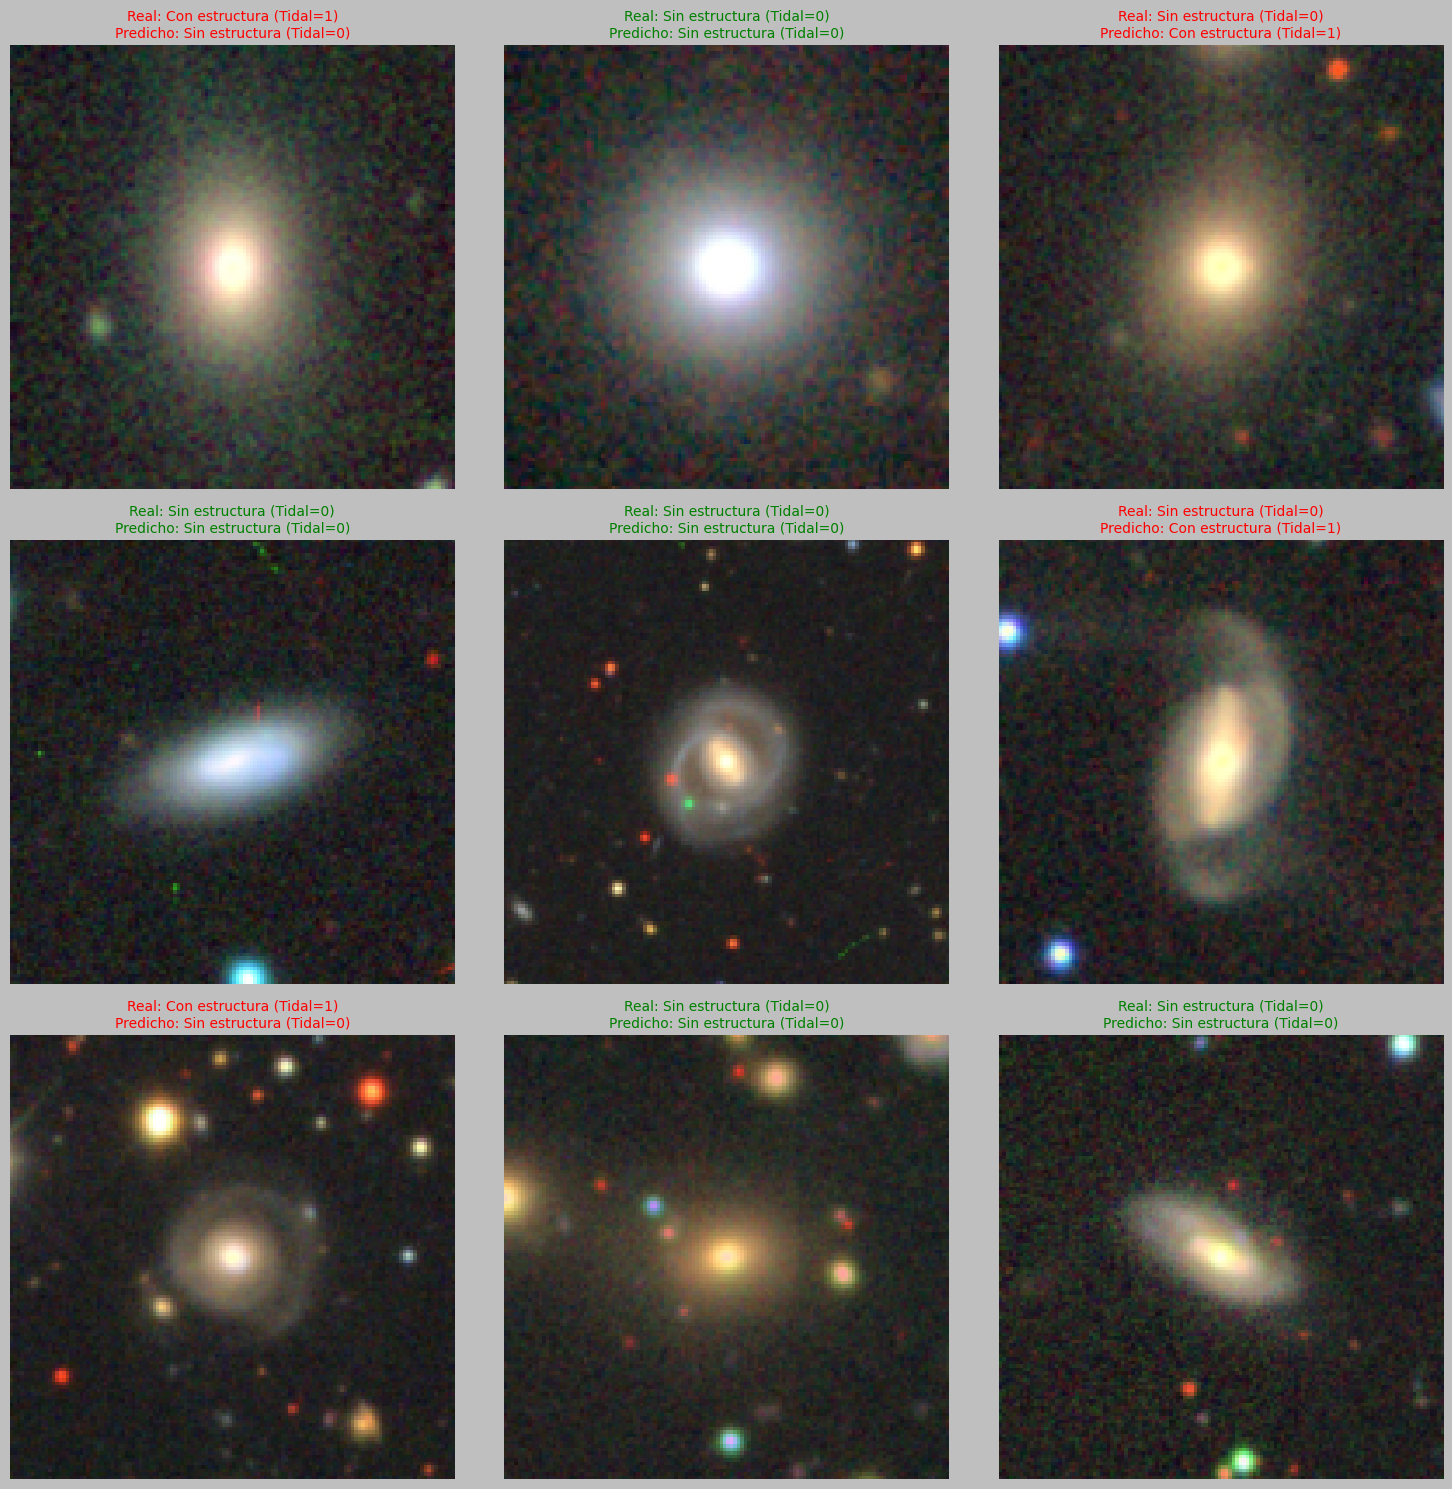

In [55]:
# Visualizar predicciones del modelo OPTIMIZADO
print("\n" + "="*80)
print("PREDICCIONES DEL MODELO OPTIMIZADO")
print("="*80)
show_predictions(model_optimized, test_dataset, device, num_images=9)


Clasificación con ResNet50 OPTIMIZADO:


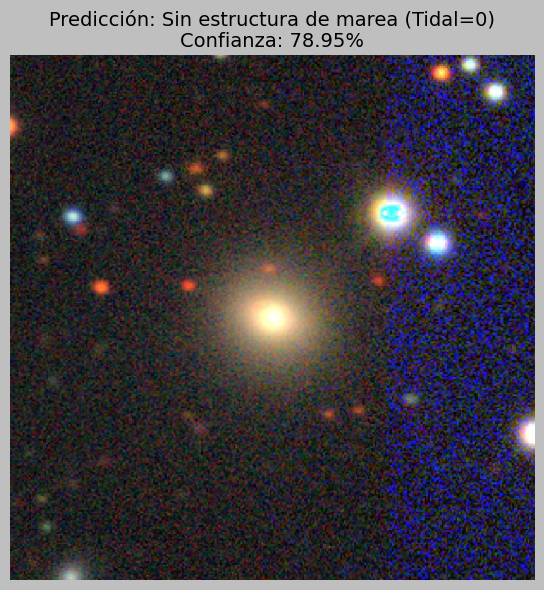

Clase predicha: Sin estructura de marea
Tidal: 0
Confianza: 78.95%

Probabilidades:
  - Sin estructura (Tidal=0): 78.95%
  - Con estructura (Tidal=1): 21.05%


(0, 78.95042896270752)

In [56]:
# Clasificar la imagen de ejemplo con el modelo OPTIMIZADO
print("\nClasificación con ResNet50 OPTIMIZADO:")
print("="*60)
classify_new_galaxy('./manga-8651-3703.jpg', model_optimized, device, transform)